# Crimes in India
### Analysis of Crimes in India
**Introduction :**

India's crime landscape is a dynamic tapestry reflecting its diverse society and evolving challenges. From bustling urban centers to remote rural areas, criminal activities span a spectrum of offenses, driven by socio-economic disparities, cultural nuances, and technological advancements. While the Indian Penal Code forms the backbone of legal deterrence, specialized laws target specific crime domains like cybercrime and terrorism. However, issues like corruption, delays in the judicial process, and inadequate law enforcement infrastructure continue to challenge effective crime control. Urban hubs witness a surge in crimes like cyber fraud and theft, while rural landscapes grapple with caste-based violence and dowry-related offenses. Modernization efforts aim to bolster law enforcement and judicial capabilities, but addressing root causes and fostering social cohesion remain paramount in India's ongoing battle against crime.

**Tasks**
- Analysis of Literacy Rate vs Total Crimes.
- Analysis of the crime type vs each state vs Literacy rate.
- Analysis of year-on-year total crime rate.
- Analysis of area vs overall crime.
- Analysis of Population vs Overall Crime.
- Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

## # Importing necessary libraries for data analysis and visualization

In [1]:
import numpy as np                   # Library for numerical operations
import pandas as pd                  # Library for data manipulation and analysis
import matplotlib.pyplot as plt      # Library for creating plots
%matplotlib inline
import seaborn as sns                # Library for statistical data visualization
import geopandas as gpd              # Library for handling geospatial data
import warnings                      # Library for handling warning messages
warnings.filterwarnings('ignore')    # Ignore warning messages for cleaner output

# Data Ingestion
- Data ingestion refers to the process of importing or loading data into a system for further processing or analysis.
- It's a crucial step in the data pipeline, as the quality and efficiency of data ingestion can significantly impact downstream analytics and decision-making

In [2]:
data = pd.read_csv("Phase - 2 Data collections.csv")

In [3]:
df = pd.DataFrame(data=data) # Make DataFrame futher analysis

In [4]:
df.head() # Checking top Five record of DataFrame

,State,Area,Population,State_Literacy_rate,Total_Crime,Crime rate 2018,Crime rate 2019,Crime rate 2020,Crime rate 2021
0,ANDHRA PRADESH,162975,53156000,133,750758,278,279,453,420
1,ARUNACHAL PRADESH,83743,1562000,133,11236,189,191,165,198
2,ASSAM,78438,35713000,171,508203,354,386,350,379
3,BIHAR,94163,126756000,140,282148,222,224,211,228
4,CHHATTISGARH,135192,30180000,172,408600,345,335,353,374


In [5]:
df.tail() # Cheking bottom five records

,State,Area,Population,State_Literacy_rate,Total_Crime,Crime rate 2018,Crime rate 2019,Crime rate 2020,Crime rate 2021
31,JAMMU & KASHMIR,42241,13603000,154,113270,237,243,275,242
32,LADHAKH,59146,300000,164,962,222,224,211,228
33,LAKSHADWEEP,32,69000,184,534,222,224,211,228
34,DELHI,1484,21359000,176,1151332,237,243,275,242
35,PUNDUCHERRY,479,1646000,173,21213,132,124,100,107


In [6]:
# Checking number of states in Dataframe
df.shape[0]

36

In [7]:
# Checking number of columns in DataFrames
df.shape[1]

9

In [8]:
# We can Check both value rows and colunmns
df.shape

(36, 9)

In [9]:
# Checking columns names in DataFrame
df.columns

Index(['State ', 'Area ', 'Population', 'State_Literacy_rate', 'Total_Crime ',
       'Crime rate 2018', 'Crime rate 2019', 'Crime rate 2020',
       'Crime rate 2021'],
      dtype='object')

### Comment :
- Most of the columns are self-explainatory

In [10]:
# Checking Duplicasy in dataset
df.duplicated().sum()

0

 No any Duplicate values in Data set

In [11]:
# Cheking Missing values in Dataset
df.isnull().sum()

State                  0
Area                   0
Population             0
State_Literacy_rate    0
Total_Crime            0
Crime rate 2018        0
Crime rate 2019        0
Crime rate 2020        0
Crime rate 2021        0
dtype: int64

<Axes: >

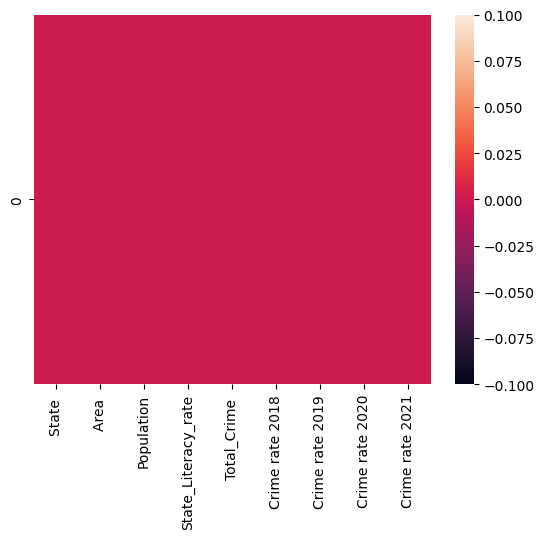

In [12]:
# We are cheking same with heatmap
sns.heatmap(df.isnull().sum().to_frame().T) # You can achieve this by using .to_frame() to convert the Series into a DataFrame, and then transpose it using .
                                            # T or .transpose() to reshape it into a suitable format.

## Comment
- from above its clearly see their is no any missing values in Dataset

In [13]:
# lets check more informations about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                36 non-null     object
 1   Area                 36 non-null     int64 
 2   Population           36 non-null     int64 
 3   State_Literacy_rate  36 non-null     int64 
 4   Total_Crime          36 non-null     int64 
 5   Crime rate 2018      36 non-null     int64 
 6   Crime rate 2019      36 non-null     int64 
 7   Crime rate 2020      36 non-null     int64 
 8   Crime rate 2021      36 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


# Comment
- Here clearly see that the State column is object an remaing 8 columns are int

In [14]:
# Checking Statistical summary of DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,36.0,8.799061e+04,9.496167e+04,32.0,15057.00,54578.0,131341.50,342239.0
Population,36.0,3.856017e+07,5.006567e+07,69000.0,1628250.00,25769500.0,56790000.00,235687000.0
State_Literacy_rate,36.0,1.617778e+02,1.458788e+01,133.0,151.75,164.0,172.25,193.0
Total_Crime,36.0,6.010585e+05,8.178524e+05,534.0,13632.00,262176.5,752166.25,3088716.0
Crime rate 2018,36.0,2.983889e+02,2.221864e+02,83.0,180.00,237.0,331.00,1288.0
Crime rate 2019,36.0,2.982778e+02,2.171568e+02,77.0,184.75,243.0,339.25,1288.0
Crime rate 2020,36.0,3.597778e+02,3.759908e+02,69.0,166.50,275.0,363.00,1809.0
Crime rate 2021,36.0,3.341111e+02,2.958963e+02,67.0,178.00,242.0,375.25,1477.0


## Comment

### State Area (km²):
- The mean state area is approximately 84,386 square kilometers, with a standard deviation of 93,653 square kilometers.
- The smallest state area is 32 square kilometers, and the largest state area is 342,239 square kilometers.
- 25% of the states have an area less than 16,579 square kilometers, while 75% have an area less than 125,562.75 square kilometers.
### Population of State:
- The mean population of states is approximately 36,677,580, with a standard deviation of 49,362,090.
- The smallest population among states is 69,000, and the largest population is 235,687,000.
- 25% of states have a population less than 1,792,750, while 75% have a population less than 51,436,000.
### State Literacy Rate:
- The mean literacy rate among states is approximately 161.45, with a standard deviation of 14.30.
- The lowest literacy rate recorded is 133, while the highest is 193.
25% of states have a literacy rate lower than 151.25, while 75% have a literacy rate lower than 172.
### Total Crime:
- The mean total reported crimes across states is approximately 569,976, with a standard deviation of 806,590.
- The minimum reported crime count is 534, while the maximum is 3,088,716.
25% of states have reported crimes less than 13,632, while 75% have reported crimes less than 748,143.50.
### Crime Rates (2018, 2019, 2020, 2021):
- Crime rates vary across years, with mean rates ranging from approximately 287 to 345 per 100,000 population.
- Standard deviations are relatively high, indicating significant variability in crime rates among states.
- Crime rates generally show an increasing trend from 2018 to 2020, with some fluctuations in 2021.
- 25% of states have crime rates below 153 (2018) to 250.5 (2020), while 75% have rates below 323.75 (2018) to 370 (2021).

<Axes: >

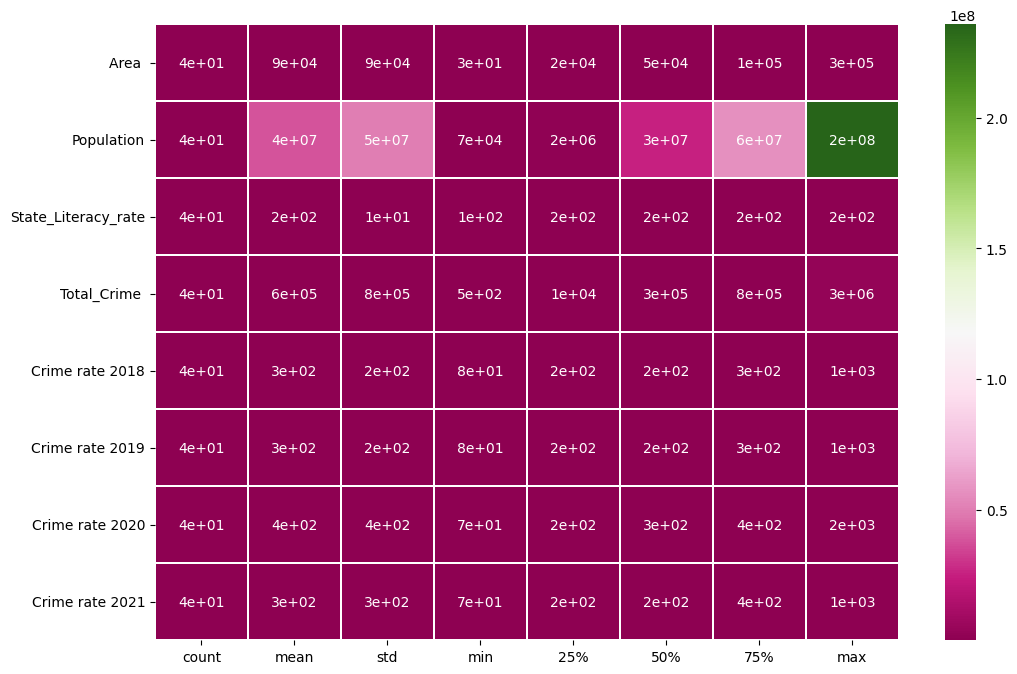

In [15]:
# We could Visualizing the above statistical matrix with help of heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.describe().T , linewidths=0.1,fmt='0.1',annot=True, cmap='PiYG')

In [16]:
# We check any correlation by using person co-relation diagram
corr = df.corr(numeric_only=True)
corr

,Area,Population,State_Literacy_rate,Total_Crime,Crime rate 2018,Crime rate 2019,Crime rate 2020,Crime rate 2021
Area,1.000000,0.734951,-0.479757,0.667327,0.254565,0.290760,0.239380,0.304960
Population,0.734951,1.000000,-0.385547,0.729609,0.223814,0.242926,0.233454,0.247321
State_Literacy_rate,-0.479757,-0.385547,1.000000,-0.080342,0.257857,0.243186,0.204875,0.191120
Total_Crime,0.667327,0.729609,-0.080342,1.000000,0.609208,0.614422,0.728456,0.689708
Crime rate 2018,0.254565,0.223814,0.257857,0.609208,1.000000,0.991742,0.880073,0.961949
Crime rate 2019,0.290760,0.242926,0.243186,0.614422,0.991742,1.000000,0.861864,0.964890
Crime rate 2020,0.239380,0.233454,0.204875,0.728456,0.880073,0.861864,1.000000,0.935402
Crime rate 2021,0.304960,0.247321,0.191120,0.689708,0.961949,0.964890,0.935402,1.000000


<Axes: >

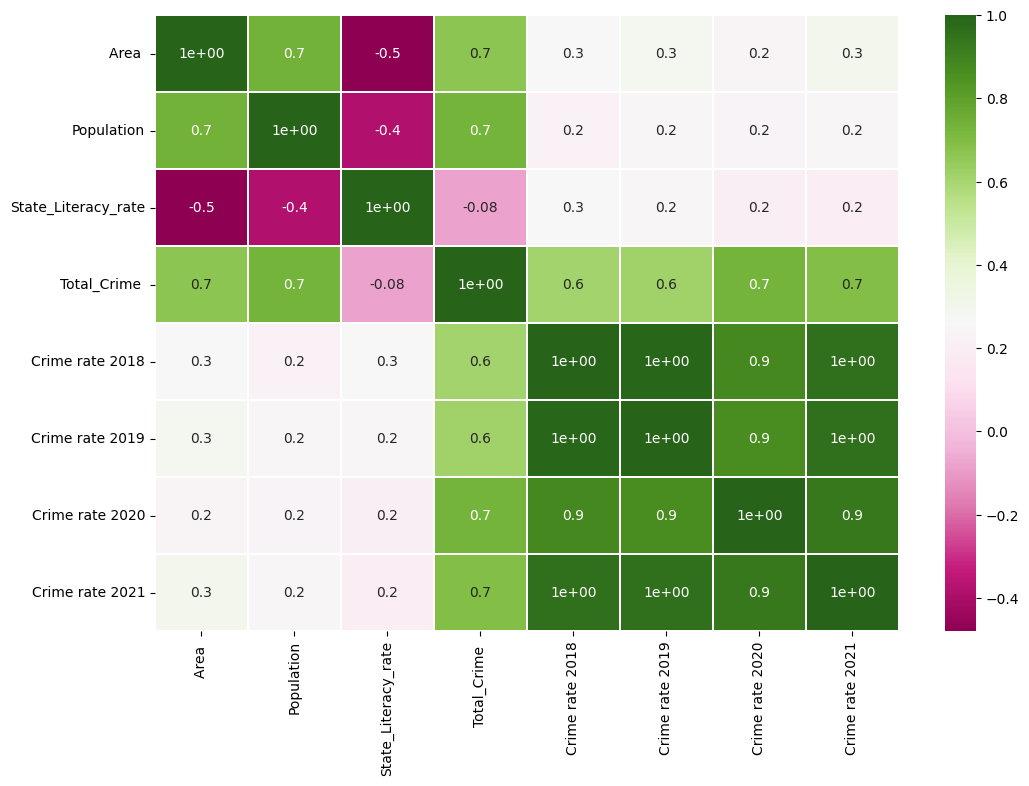

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,linewidths=0.1,fmt='0.1',annot=True, cmap='PiYG')

## Comments
### State Area (km²):
- Strong positive correlation with Population of State (0.742140) and Total Crime (0.676439).
- Moderate positive correlation with Crime rates across all years (0.260028 to 0.326981).
### Population of State:
- Strong positive correlation with State Area (0.742140) and Total Crime (0.736955).
- Moderate positive correlation with Crime rates across all years (0.249997 to 0.270910).
### State Literacy Rate:
- Weak negative correlation with State Area (-0.453602).
- Weak positive correlation with Crime rates across all years (0.204104 to 0.269901).
### Total Crime:
- Strong positive correlation with State Area (0.676439) and Population of State (0.736955).
- Strong positive correlation with Crime rates across all years (0.622043 to 0.735749).
### Crime Rates (2018, 2019, 2020, 2021):
- Moderate to strong positive correlations among each other, indicating consistency in crime rates over the years.
- The highest correlation is observed between Crime_rate_2018 and Crime_rate_2019 (0.992052), indicating high similarity between crime rates in these two consecutive years.

Understanding these correlations can help identify relationships between different variables in the dataset. For example, the strong positive correlations between population size, state area, and total reported crimes suggest that larger states with higher populations tend to have more reported crimes. Similarly, the consistent correlations among crime rates across different years indicate stability or persistence in crime trends over time.

In [18]:
df.columns

Index(['State ', 'Area ', 'Population', 'State_Literacy_rate', 'Total_Crime ',
       'Crime rate 2018', 'Crime rate 2019', 'Crime rate 2020',
       'Crime rate 2021'],
      dtype='object')

# Analysis points
## 1) Analysis of Literacy Rate vs Total Crimes.


### Statistical details of State Literacy Rate

In [19]:
print("Minimum of State_Literacy_rate :",np.min(df['State_Literacy_rate']))  # Minimum of State_Literacy_rate

Minimum of State_Literacy_rate : 133


In [20]:
print("Maximun of State_Literacy_rate :",np.max(df['State_Literacy_rate']))  # Maximun of State_Literacy_rate

Maximun of State_Literacy_rate : 193


In [21]:
print("Mean of State_Literacy_rate :",np.mean(df['State_Literacy_rate'])) # Average of State_Literacy_rate

Mean of State_Literacy_rate : 161.77777777777777


In [22]:
print("Median of State_Literacy_rate:",np.median(df['State_Literacy_rate'])) # Median of State_Literacy_rate

Median of State_Literacy_rate: 164.0


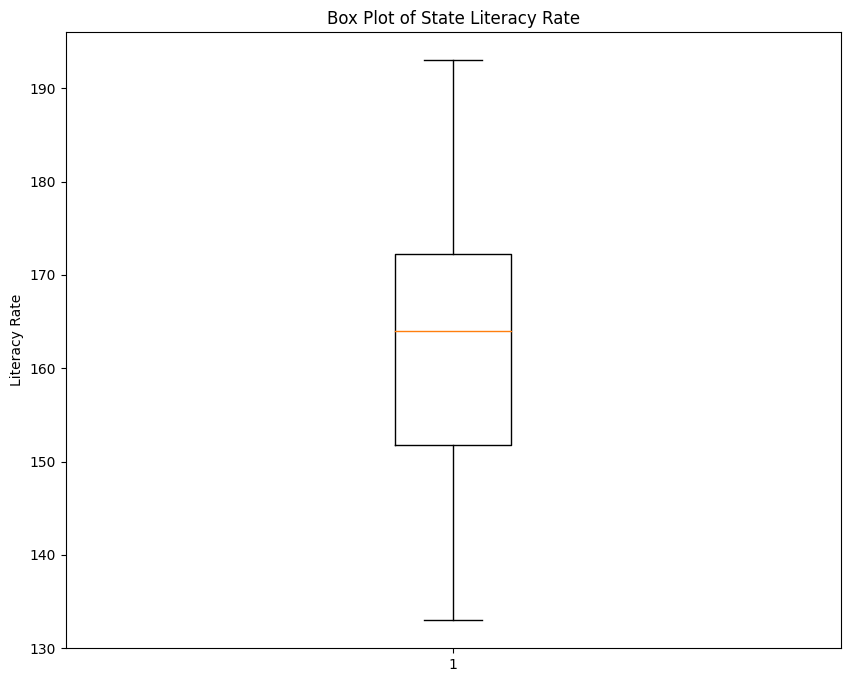

In [23]:
plt.figure(figsize=(10,8))
plt.boxplot(df['State_Literacy_rate'])
plt.title('Box Plot of State Literacy Rate')
plt.ylabel('Literacy Rate')
plt.show()

### Comment :
- From Box Plot we clearly see the no any outliers are present in the State Literacy rate.
- Minimum of State_Literacy_rate 133
- Maximun of State_Literacy_rate 193
- Average of State_Literacy_rate 161.77
- Median of State_Literacy_rate 164

<Axes: ylabel='State_Literacy_rate'>

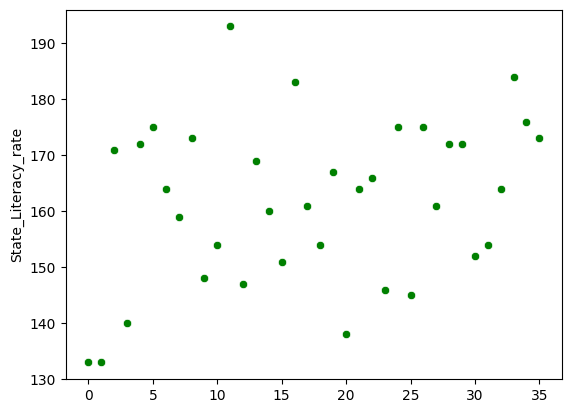

In [24]:
sns.scatterplot(df['State_Literacy_rate'],color='green')

- From above Scatter plot we could clearly see that no any outliers

## Statistical details of Total_Crime

In [25]:
print("Minimum Value of Total Crime :",np.min(df['Total_Crime '])) # Minimum count of Total Crime

Minimum Value of Total Crime : 534


In [26]:
print("Maximum Value of Total Crime :",np.max(df['Total_Crime '])) # Maximum value of Total Crime

Maximum Value of Total Crime : 3088716


In [27]:
print("Average Value of Total Crime :" , np.mean(df['Total_Crime '])) # Average Value of Total Crime

Average Value of Total Crime : 601058.5277777778


In [28]:
print("Median Value of Total Crime :" , np.median(df['Total_Crime ']))

Median Value of Total Crime : 262176.5


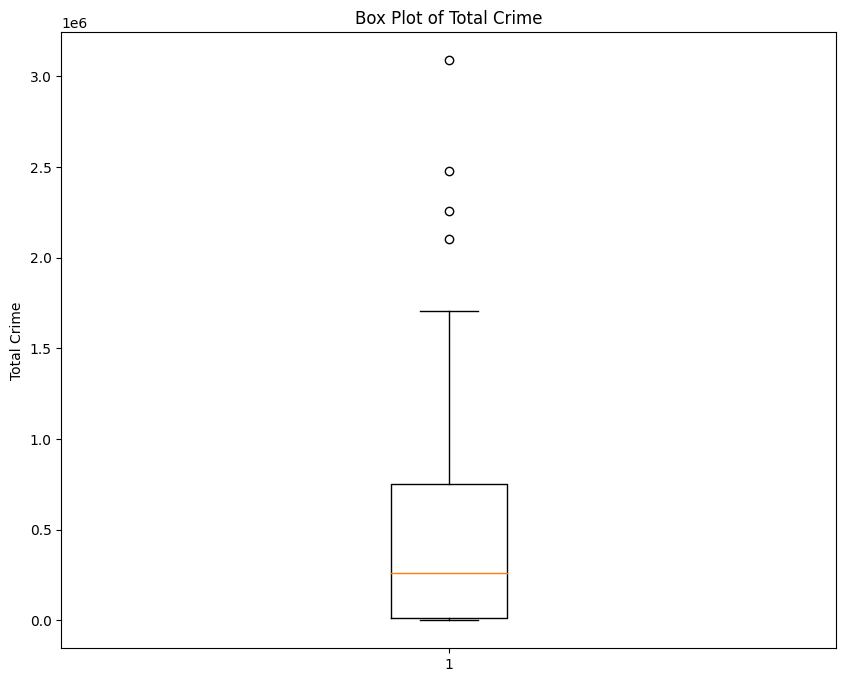

In [29]:
plt.figure(figsize=(10,8))
plt.boxplot(df['Total_Crime '])
plt.title('Box Plot of Total Crime')
plt.ylabel('Total Crime')
plt.show()

### Comment
- From Above Box plot we could clearly see some outlier are present in the Total Crime rate
- Minimum count of Total Crime 534
- Maximum count of Total Crime 3088716
- Average count of Total Crime 601058.52
- Median count if Total Crime 262176.5
- five summary are 25 % Data are laying near to zero and 50 % are laying 0.3
and 75% data are laying 0.7 total crimes and maximum Data are laying 0 to 1.7 crime rate

<Axes: ylabel='Total_Crime '>

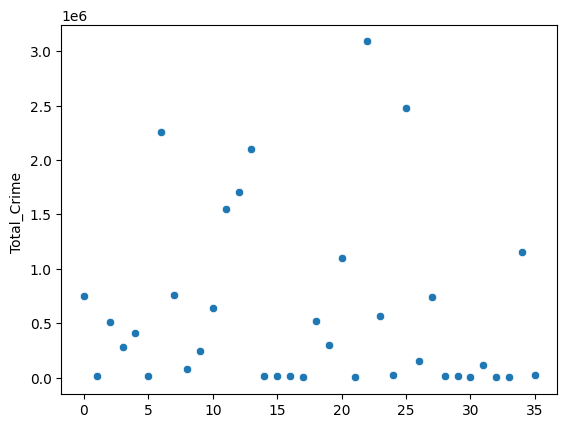

In [30]:
sns.scatterplot(df['Total_Crime '])

- From Scatter plot we clearly see distribution of crime rate containing some outliers

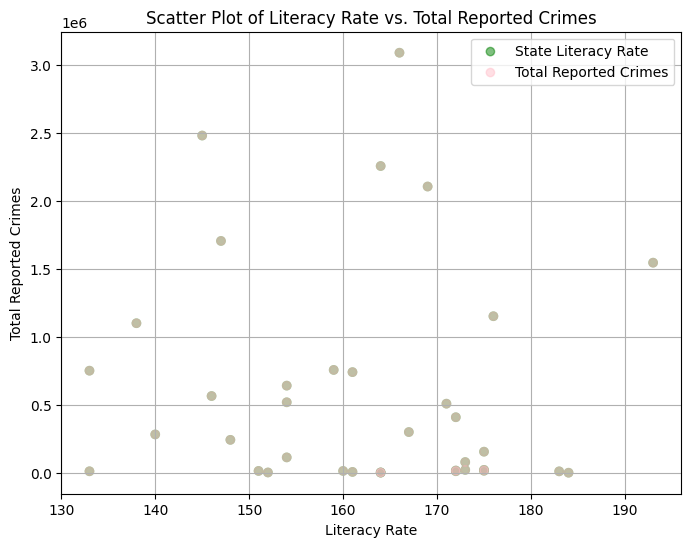

In [31]:
# Create a scatter plot with different colors for 'State_Literacy_rate' and 'Total_Crime'
plt.figure(figsize=(8, 6))
plt.scatter(df['State_Literacy_rate'], df['Total_Crime '], c=['green' for _ in df['State_Literacy_rate']], label='State Literacy Rate', alpha=0.5)
plt.scatter(df['State_Literacy_rate'], df['Total_Crime '], c=['pink' for _ in df['Total_Crime ']], label='Total Reported Crimes', alpha=0.5)
plt.title('Scatter Plot of Literacy Rate vs. Total Reported Crimes')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Reported Crimes')
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines for better visualization
plt.show()

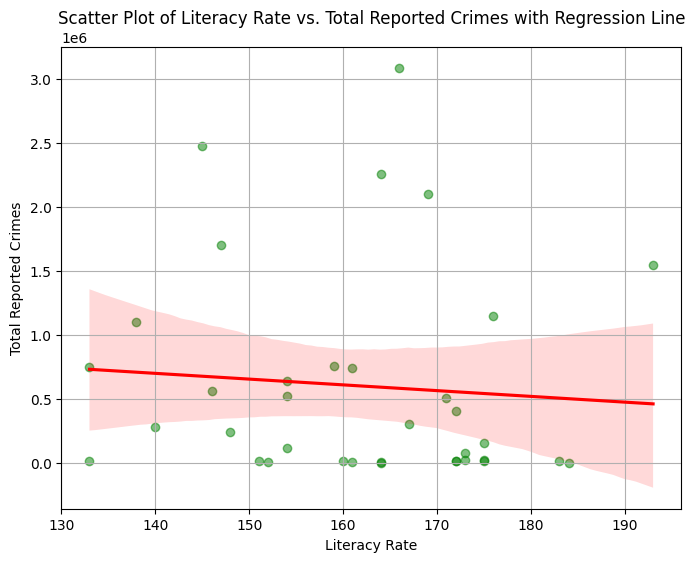

In [32]:
# Create a scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='State_Literacy_rate', y='Total_Crime ', data=df, scatter_kws={'color': 'green', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Literacy Rate vs. Total Reported Crimes with Regression Line')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Reported Crimes')
plt.grid(True)  # Add gridlines for better visualization
plt.show()

### Comment :
- From Above Scatter plot of Literacy rate vs Total Crime we clearly see that the their is no mejor relation between them

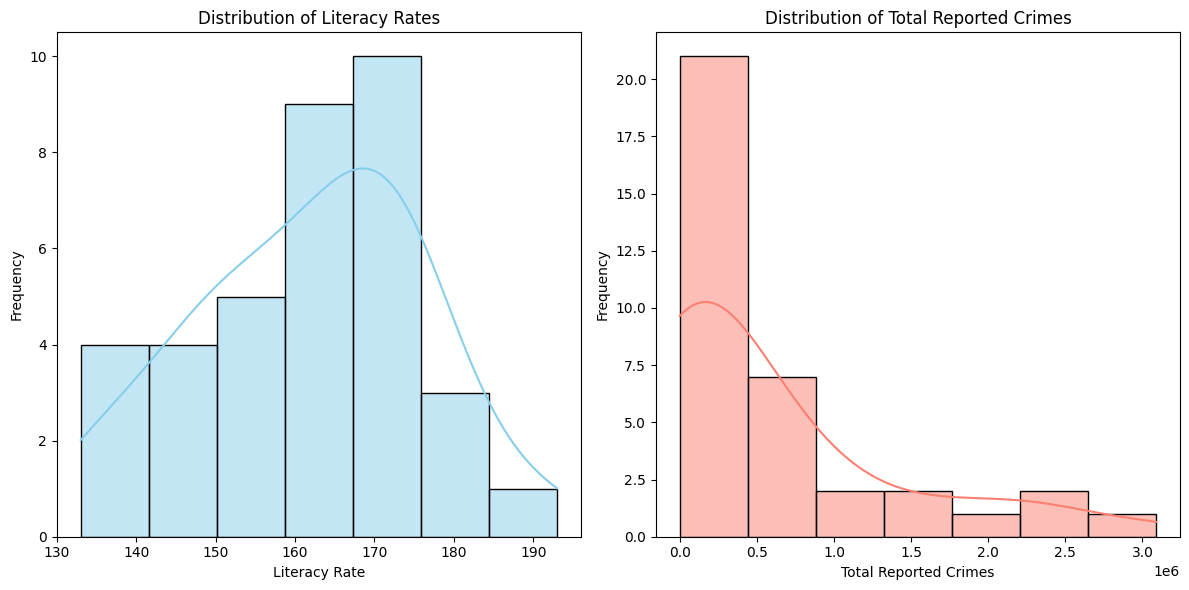

In [33]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for literacy rate
sns.histplot(df['State_Literacy_rate'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Literacy Rates')
axes[0].set_xlabel('Literacy Rate')
axes[0].set_ylabel('Frequency')

# Plot histogram for total reported crimes
sns.histplot(df['Total_Crime '], ax=axes[1], kde=True, color='salmon')
axes[1].set_title('Distribution of Total Reported Crimes')
axes[1].set_xlabel('Total Reported Crimes')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

# Comment :
- Literacy rate ranging from 140 to 190 and maximum frequent count we see range 150 to 170
- Literacy Rate some how look normal distributions
- Maximum frequency of Total crime reported 1 having more frequency count.
- Total Crime data look like log transform or left shifted

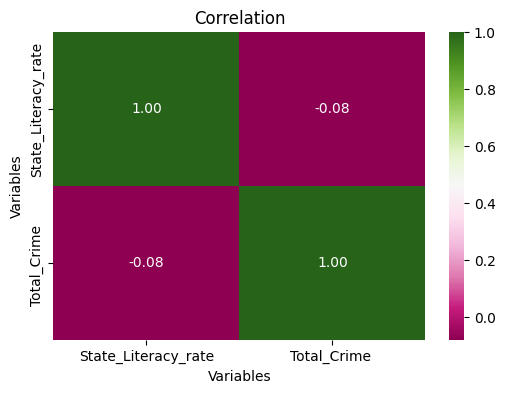

In [34]:
# Create a correlation matrix
correlation_matrix = df[['State_Literacy_rate', 'Total_Crime ']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

### Comment
- From the above pearson correlation diagram it is clearly see the their is no any correlation between State Literacy rate vs Total crimes

# 2) Analysis of the crime type vs each state vs Literacy rate.

In [35]:
data_1 = pd.read_csv('Phase - 2 Data Collections2.csv') # For this task I have prepare new Data set reading

# 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_crime_rate' # Dataset links but dont use directly need to constract the table as per requirements


In [36]:
df1 = pd.DataFrame(data=data_1)  # Making Data set into DataFrame

In [37]:
df1.head() # Top five records of Dataframe

,State / UT,Violent Crimes,Murder,Rape,Kidnapping,Crimes Against Children,Extortion,Robbery,Hit & Run,Drugs Trafficking,Illegal Arms,State_Literacy_rate
0,Andhra Pradesh,13.7,1.8,4.5,1.6,17.7,0.6,0.5,1.4,2.1,0.1,133
1,Arunachal Pradesh,32.0,3.2,11.1,5.5,27.5,5.3,3.3,2.6,2.9,0.1,133
2,Assam,76.6,3.4,10.0,21.6,43.7,3.9,5.4,4.2,2.9,0.5,171
3,Bihar,35.4,2.3,1.3,8.2,14.5,0.5,2.0,0.8,0.2,2.5,140
4,Chhattisgarh,28.6,3.4,7.4,9.1,61.6,0.3,1.9,6.0,3.7,0.4,172


In [38]:
df1.columns # Columns names of DataFrame

Index(['State / UT', 'Violent Crimes', 'Murder', 'Rape', 'Kidnapping',
       'Crimes Against Children', 'Extortion', 'Robbery', 'Hit & Run',
       'Drugs Trafficking', 'Illegal Arms', 'State_Literacy_rate'],
      dtype='object')

## Literacy rate of each States in India

In [39]:
# Retriving States against Literacy rate of each States
state_literacy_data = df1[['State / UT', 'State_Literacy_rate']]
state_literacy_data

,State / UT,State_Literacy_rate
0,Andhra Pradesh,133
1,Arunachal Pradesh,133
2,Assam,171
3,Bihar,140
4,Chhattisgarh,172
5,Goa,175
6,Gujarat,164
7,Haryana,159
8,Himachal Pradesh,173
9,Jharkhand,148


### Hiighest literacy rate State in India

In [40]:
# Find the row with the highest literacy rate
highest_literacy_row = df1[df1['State_Literacy_rate'] == df1['State_Literacy_rate'].max()]

# Extract the state name and highest literacy rate
highest_literacy_state = highest_literacy_row['State / UT'].values[0]
highest_literacy_rate = highest_literacy_row['State_Literacy_rate'].values[0]

print("State with the highest literacy rate:", highest_literacy_state, "(", highest_literacy_rate, ")")


State with the highest literacy rate: Kerala ( 193 )



**- Highest literacy rate State in India : Kerala ( 193 )**

##Lowest literacy rate States in India

In [41]:
# Find the row with the lowest literacy rate
lowest_literacy_row = df1[df1['State_Literacy_rate'] == df1['State_Literacy_rate'].min()]

# Extract the state name and lowest literacy rate
lowest_literacy_state = lowest_literacy_row['State / UT'].values[0]
lowest_literacy_rate = lowest_literacy_row['State_Literacy_rate'].values[0]

print("State with the lowest literacy rate:", lowest_literacy_state, "(", lowest_literacy_rate, ")")


State with the lowest literacy rate: Andhra Pradesh ( 133 )


**- Lowest Literacy rates State in India : Andra Pradesh (133)**



**Sorting Data for checking top and bottom three States of India in Litracy rates**

In [42]:
# Sort the DataFrame by literacy rate in descending order
df_sorted_desc = df1.sort_values(by='State_Literacy_rate', ascending=False)

In [43]:
# Top 3 states with the highest literacy rates
top_3_states = df_sorted_desc.head(3)[['State / UT', 'State_Literacy_rate']]
print("Top 3 states with the highest literacy rates:")
for index, row in top_3_states.iterrows():
    print(row['State / UT'], "(", row['State_Literacy_rate'], ")")

Top 3 states with the highest literacy rates:
Kerala ( 193 )
Puducherry ( 184 )
Nagaland ( 183 )


### Comments
- Top 3 states with the highest literacy rates:

- 1) Kerala ( 193 )

- 2) Puducherry ( 184 )

- 3) Nagaland ( 183 )

In [44]:
# Bottom 3 states with the lowest literacy rates
bottom_3_states = df_sorted_desc.tail(3)[['State / UT', 'State_Literacy_rate']]

print("\nBottom 3 states with the lowest literacy rates:")
for index, row in bottom_3_states.iterrows():
    print(row['State / UT'], "(", row['State_Literacy_rate'], ")")


Bottom 3 states with the lowest literacy rates:
Tamil Nadu ( 138 )
Arunachal Pradesh ( 133 )
Andhra Pradesh ( 133 )


### Comment

- Bottom 3 states with the lowest literacy rates:
- Tamil Nadu ( 138 )
- Arunachal Pradesh ( 133 )
- Andhra Pradesh ( 133 )

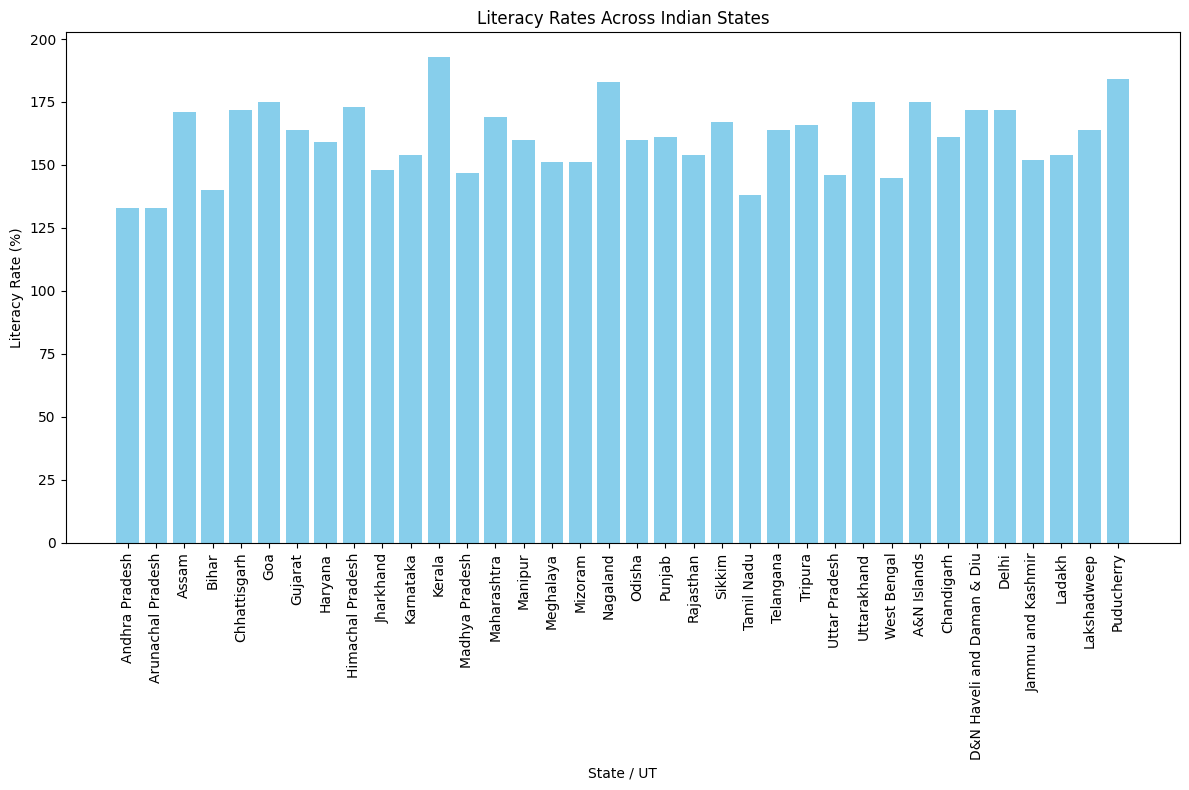

In [45]:
state_names = state_literacy_data['State / UT']
literacy_rates = state_literacy_data['State_Literacy_rate']

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(state_names, literacy_rates, color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('State / UT')
plt.ylabel('Literacy Rate (%)')
plt.title('Literacy Rates Across Indian States')
plt.tight_layout()
plt.show()

## Comment
- Here we could clearly see litracy rate of each States in India
- Lowest Literacy rate State in India is Andhra Pradesh
- Highest Literacy rate State in India is Kerala


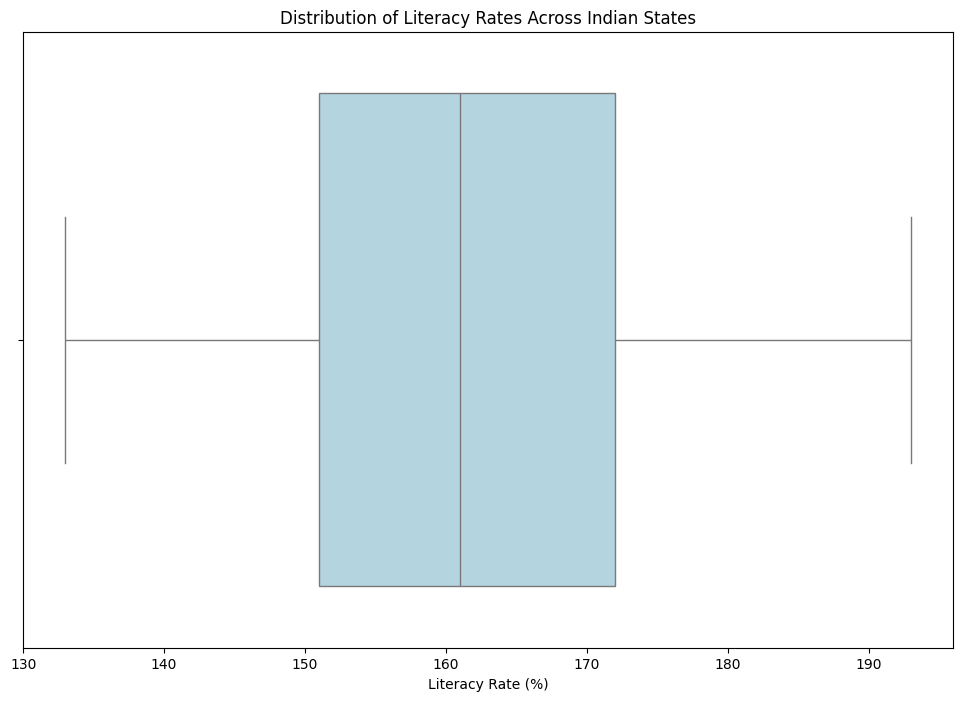

In [46]:
# Distribution of Literacy Rates Across Indian States
plt.figure(figsize=(12, 8))
sns.boxplot(x='State_Literacy_rate', data=df1, color='lightblue')
plt.xlabel('Literacy Rate (%)')
plt.title('Distribution of Literacy Rates Across Indian States')
plt.show()

### Comments
- Distributions of Literacy rate across the India
- Min value is 133
- Max values is 193
- Median is 164
- Maximum data lies between 152 to 173 i.e inner quartile range

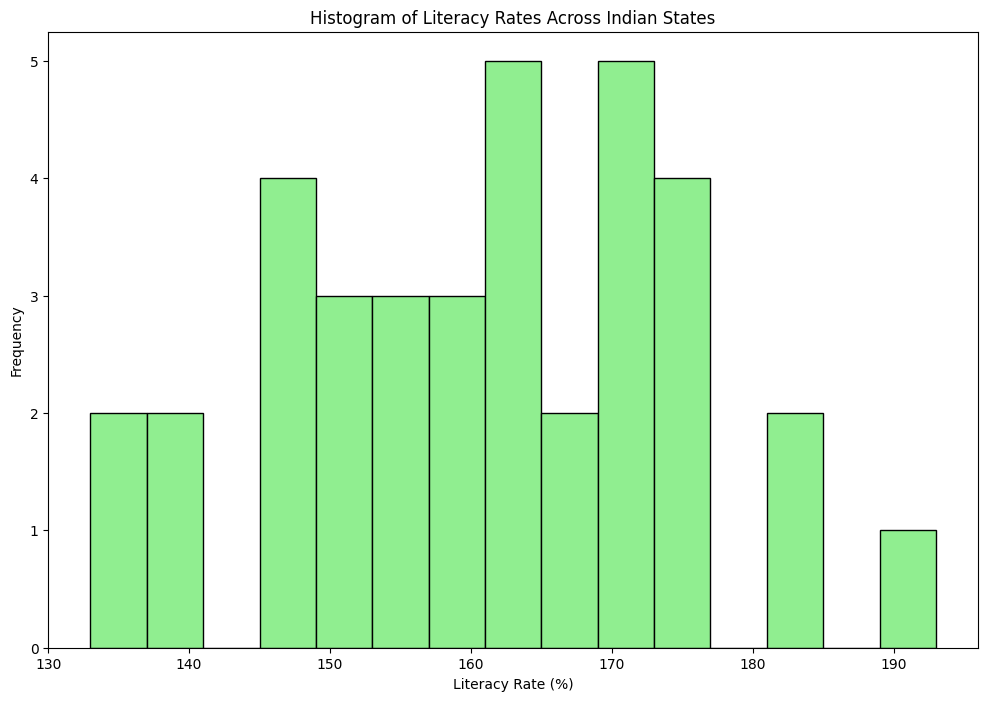

In [47]:
# Histogram of Literacy Rates Across Indian States
plt.figure(figsize=(12, 8))
plt.hist(df1['State_Literacy_rate'], bins=15, color='lightgreen', edgecolor='black')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Literacy Rates Across Indian States')
plt.show()


**From histogram we could see distribution look like normal distribution**

## Analysing Violent Crimes State wise

## Voilet Crime States in India


In [48]:
# Retrieve states and the number of violent crimes
state_violent_crimes = df1[['State / UT', 'Violent Crimes']]
state_violent_crimes

,State / UT,Violent Crimes
0,Andhra Pradesh,13.7
1,Arunachal Pradesh,32.0
2,Assam,76.6
3,Bihar,35.4
4,Chhattisgarh,28.6
5,Goa,22.1
6,Gujarat,11.9
7,Haryana,43.3
8,Himachal Pradesh,23.8
9,Jharkhand,34.9


# Highest number of violent crimes in India

In [49]:
# Find the state with the highest number of violent crimes
highest_violent_crime_state = df1.loc[df1['Violent Crimes'].idxmax(), 'State / UT']
highest_violent_crime_count = df1['Violent Crimes'].max()
print("Highest number of violent crimes State :", highest_violent_crime_state, "(", highest_violent_crime_count, "crimes)")

Highest number of violent crimes State : Assam ( 76.6 crimes)


# Lowest number of violent crimes in india

In [50]:
# Find the state with the lowest number of violent crimes
lowest_violent_crime_state = df1.loc[df1['Violent Crimes'].idxmin(), 'State / UT']
lowest_violent_crime_count = df1['Violent Crimes'].min()
print("Lowest number of violent crimes State :", lowest_violent_crime_state, "(", lowest_violent_crime_count, "crimes)")

Lowest number of violent crimes State : Nagaland ( 7.2 crimes)


In [51]:
# Sort the DataFrame by 'Violent Crimes' column in descending order
df_sorted_desc = df1.sort_values(by='Violent Crimes', ascending=False)

## Top 3 states with the highest number of violent crimes

In [52]:
# Top 3 states with the highest number of violent crimes
top_3_states_highest_crime = df_sorted_desc.head(3)[['State / UT', 'Violent Crimes']]
print("Top 3 states with the highest number of violent crimes:")
top_3_states_highest_crime

Top 3 states with the highest number of violent crimes:


,State / UT,Violent Crimes
2,Assam,76.6
31,Delhi,57.0
27,West Bengal,48.7


## Bottom 3 states with the lowest number of violent crimes

In [53]:
# Bottom 3 states with the lowest number of violent crimes
bottom_3_states_lowest_crime = df_sorted_desc.tail(3)[['State / UT', 'Violent Crimes']]
print("\nBottom 3 states with the lowest number of violent crimes:")
bottom_3_states_lowest_crime


Bottom 3 states with the lowest number of violent crimes:


,State / UT,Violent Crimes
33,Ladakh,7.7
34,Lakshadweep,7.4
17,Nagaland,7.2


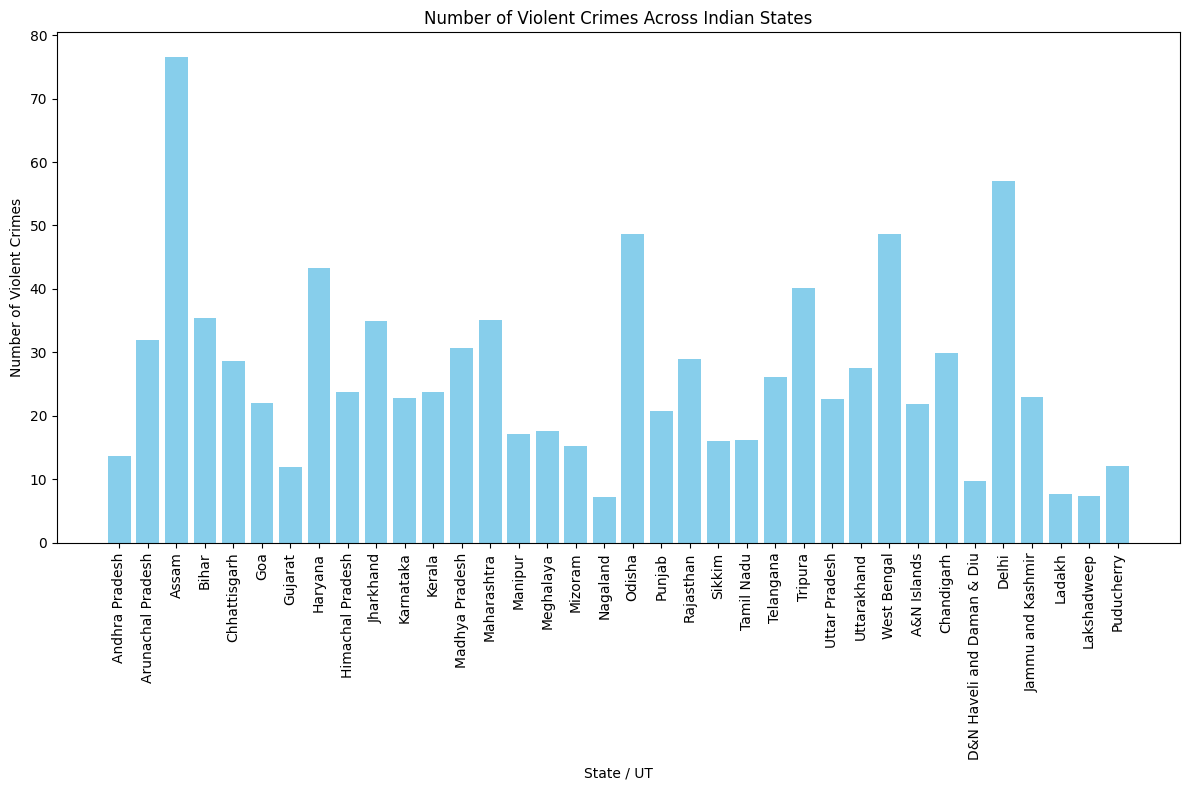

In [54]:
# Retrieve state names and the number of violent crimes
state_names = df1['State / UT']
violent_crimes = df1['Violent Crimes']

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(state_names, violent_crimes, color='skyblue')
plt.xlabel('State / UT')
plt.ylabel('Number of Violent Crimes')
plt.title('Number of Violent Crimes Across Indian States')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##  Comment
- Here we see States wise Voilent Crimes in India
- Higest voilent Crime State in India is Assam 76.6
- Lowest Voilent Crimes State in india is Nagaland  7.2


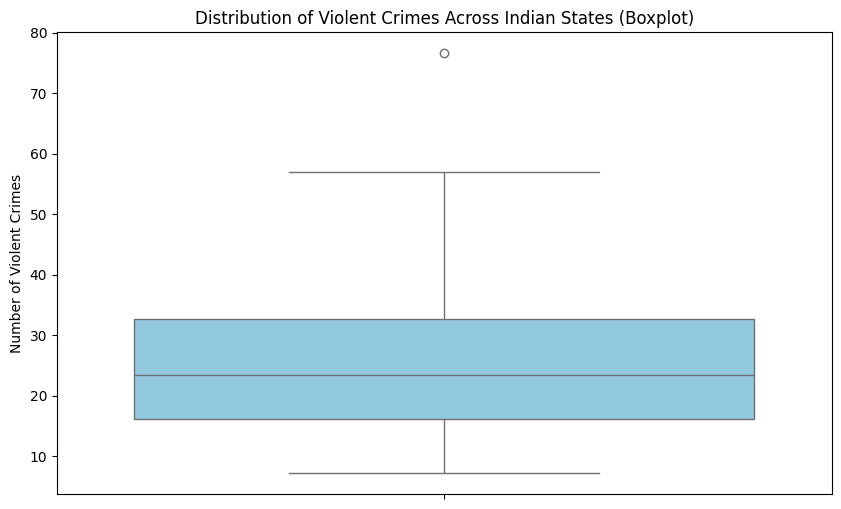

In [55]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Violent Crimes', color='skyblue')
plt.title('Distribution of Violent Crimes Across Indian States (Boxplot)')
plt.ylabel('Number of Violent Crimes')
plt.show()

## Comments
- Distributions of Voilet Crimes Across Indian Stats
- Here we could clearly say that Assam is Highest but which outlier Because rest
State of india below 60
- Max one 77.6 out consider as outlier
- Min one is 7.2
- Median near to 23
- Most of Data Distribution between 17 to 33

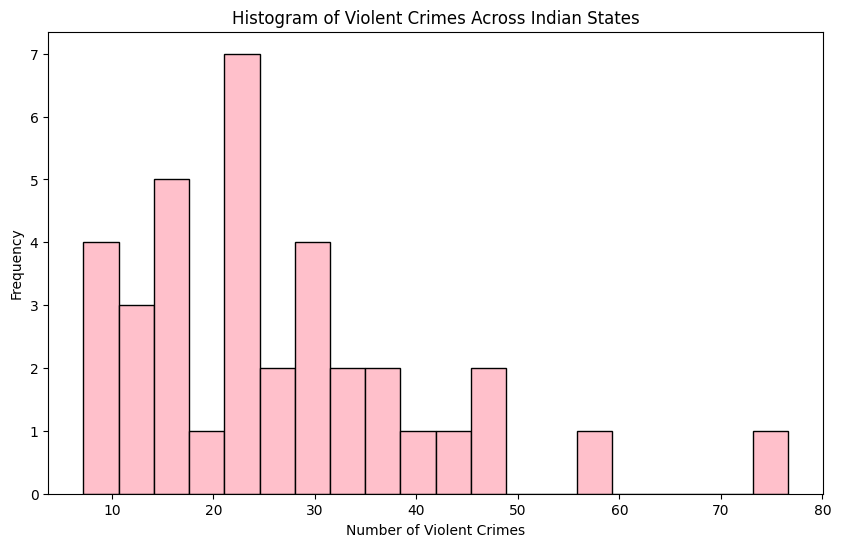

In [56]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['Violent Crimes'], bins=20, color='pink', edgecolor='black')
plt.title('Histogram of Violent Crimes Across Indian States')
plt.xlabel('Number of Violent Crimes')
plt.ylabel('Frequency')
plt.show()

## Comment
- Histrogram of Violent Crimes Across the Indian States
- Distribution look lies Rigth Skewed
- Max frequent count near to 7 at 23

In [57]:
df1.columns

Index(['State / UT', 'Violent Crimes', 'Murder', 'Rape', 'Kidnapping',
       'Crimes Against Children', 'Extortion', 'Robbery', 'Hit & Run',
       'Drugs Trafficking', 'Illegal Arms', 'State_Literacy_rate'],
      dtype='object')

## Analysis of State wise Murder

## State Wise Murders in India

In [58]:
# Retrieve states and the number of Murders
state_Murders = df1[['State / UT', 'Murder']]
state_Murders

,State / UT,Murder
0,Andhra Pradesh,1.8
1,Arunachal Pradesh,3.2
2,Assam,3.4
3,Bihar,2.3
4,Chhattisgarh,3.4
5,Goa,1.7
6,Gujarat,1.4
7,Haryana,3.8
8,Himachal Pradesh,1.2
9,Jharkhand,4.1


# - Top 3 States with the highest number of murders in India

In [59]:
# Find the top 3 states with the highest number of murders
top_3_states_highest_murder = df1.nlargest(3, 'Murder')[['State / UT', 'Murder']]
print("Top 3 states with the highest number of murders:")
top_3_states_highest_murder

Top 3 states with the highest number of murders:


,State / UT,Murder
9,Jharkhand,4.1
28,A&N Islands,4.0
7,Haryana,3.8


## Bottom 3 States with the lowest number of murders in India

In [60]:
# Find the bottom 3 states with the lowest number of murders
bottom_3_states_lowest_murder = df1.nsmallest(3, 'Murder')[['State / UT', 'Murder']]
print("Bottom 3 states with the lowest number of murders:")
bottom_3_states_lowest_murder

Bottom 3 states with the lowest number of murders:


,State / UT,Murder
11,Kerala,0.9
32,Jammu and Kashmir,1.0
8,Himachal Pradesh,1.2


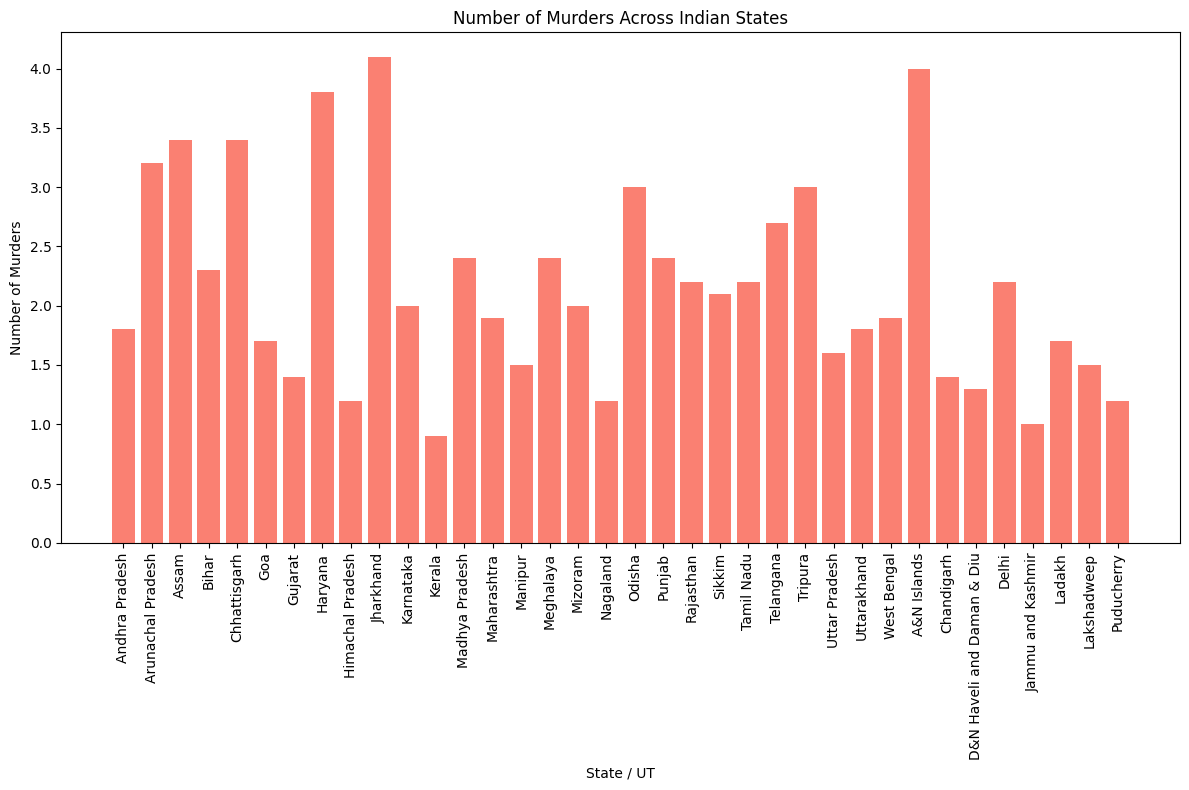

In [61]:
# Retrieve state names and the number of murders
state_names = df1['State / UT']
murder_counts = df1['Murder']

# Create a bar plot for murders
plt.figure(figsize=(12, 8))
plt.bar(state_names, murder_counts, color='salmon')
plt.xlabel('State / UT')
plt.ylabel('Number of Murders')
plt.title('Number of Murders Across Indian States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Comment
- In Bar Plot we see States wise Murders in india
- Here we see Jharkhand States in Higest murders above 4
- Here we also see Kerala States is Lowest murders below 1

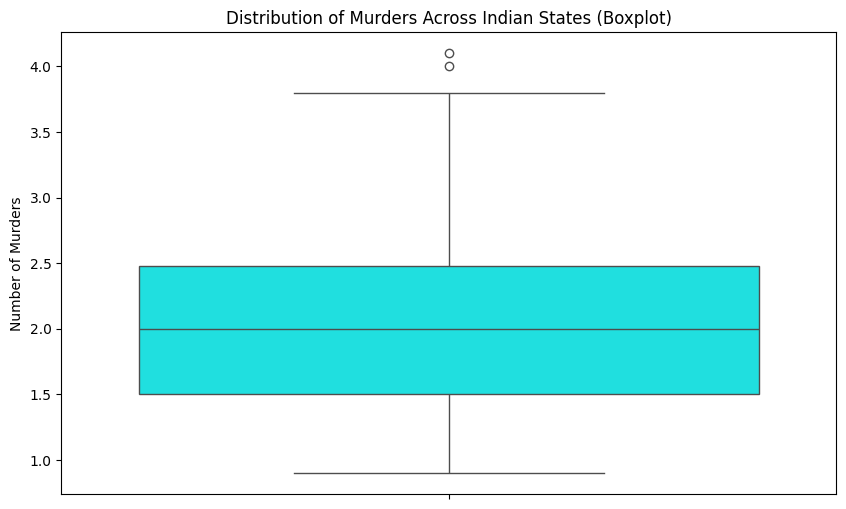

In [62]:
# Create a boxplot for murders
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Murder', color='cyan')
plt.title('Distribution of Murders Across Indian States (Boxplot)')
plt.ylabel('Number of Murders')
plt.show()

### Comment
- Distribution of the Muders across indian States
- Here we clear their is two outlier which is JharKhand and A & N Islands
- Max values is above 4 but outliers
- Min value is below 1
- Maximun Murder range lies between 1.5 to 2.5 range


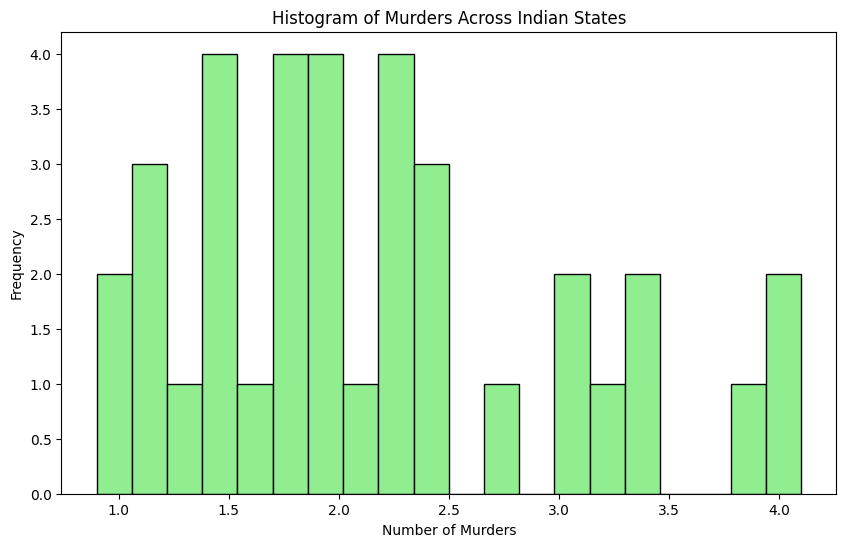

In [63]:
# Create a histogram for murders
plt.figure(figsize=(10, 6))
plt.hist(df1['Murder'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Murders Across Indian States')
plt.xlabel('Number of Murders')
plt.ylabel('Frequency')
plt.show()

## Comment
- Histogram of Murder Across the Indian States
- The Murder data distribution look like rigth Skewed one

## Analysis of Rape in India States wise

## Retrieve States and the number of Rapes

In [64]:
# Retrieve states and the number of Rapes
state_rapes = df1[['State / UT', 'Rape']]
state_rapes

,State / UT,Rape
0,Andhra Pradesh,4.5
1,Arunachal Pradesh,11.1
2,Assam,10.0
3,Bihar,1.3
4,Chhattisgarh,7.4
5,Goa,9.3
6,Gujarat,1.8
7,Haryana,12.3
8,Himachal Pradesh,9.8
9,Jharkhand,7.6


In [65]:
# Sort the DataFrame by 'Rape' column in descending order
df_sorted_desc = df1.sort_values(by='Rape', ascending=False)

## Top 3 States with the highest number of rapes in India

In [66]:
# Find the top 3 states with the highest number of rapes
top_3_states_highest_rape = df1.nlargest(3, 'Rape')[['State / UT', 'Rape']]
print("Top 3 states with the highest number of rapes:")
top_3_states_highest_rape

Top 3 states with the highest number of rapes:


,State / UT,Rape
20,Rajasthan,16.4
29,Chandigarh,13.3
31,Delhi,12.9


##  Bottom 3 States with the lowest number of rapes in India

In [67]:
# Find the bottom 3 states with the lowest number of rapes
bottom_3_states_lowest_rape = df1.nsmallest(3, 'Rape')[['State / UT', 'Rape']]
print("\nBottom 3 states with the lowest number of rapes:")
bottom_3_states_lowest_rape


Bottom 3 states with the lowest number of rapes:


,State / UT,Rape
34,Lakshadweep,0.0
35,Puducherry,0.2
17,Nagaland,0.4


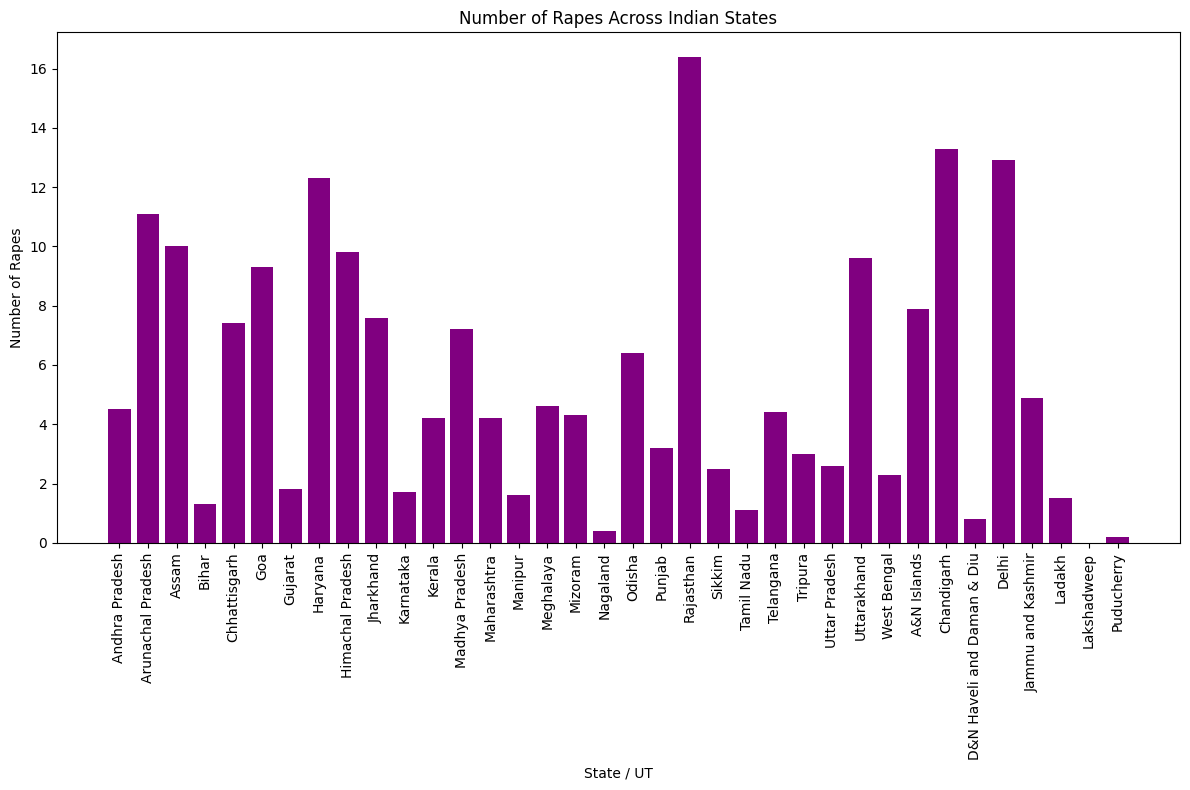

In [68]:
# Retrieve state names and the number of rapes
state_names = df1['State / UT']
rape_counts = df1['Rape']
# Create a bar plot for rapes
plt.figure(figsize=(12, 8))
plt.bar(state_names, rape_counts, color='purple')
plt.xlabel('State / UT')
plt.ylabel('Number of Rapes')
plt.title('Number of Rapes Across Indian States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Comment
- Here we see Number of Rapes Across the States in India
- Higest Rapes State is Rajasthan in india
- Lowest Staes are Lakshadweep , Puducherry and Nagaland

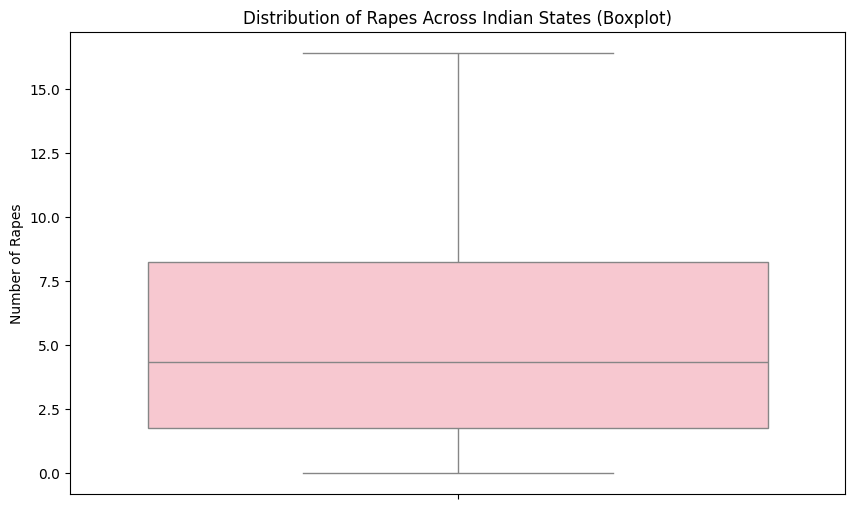

In [69]:
# Create a boxplot for rapes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Rape', color='pink')
plt.title('Distribution of Rapes Across Indian States (Boxplot)')
plt.ylabel('Number of Rapes')
plt.show()

## Comment
- Distribution of Rape Across Indian States
- We see Max value is above 16
- Min value near to 0
- Maximum Value range of Rapes lies between 1.5 to near to 8

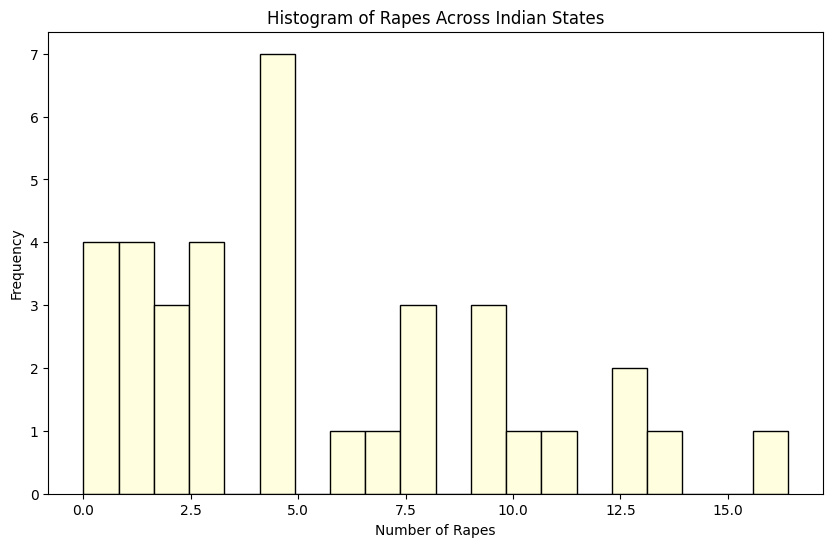

In [70]:
# Create a histogram for rapes
plt.figure(figsize=(10, 6))
plt.hist(df1['Rape'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Histogram of Rapes Across Indian States')
plt.xlabel('Number of Rapes')
plt.ylabel('Frequency')
plt.show()

## Comment
- Here we can't see any pattern

In [71]:
df1.columns

Index(['State / UT', 'Violent Crimes', 'Murder', 'Rape', 'Kidnapping',
       'Crimes Against Children', 'Extortion', 'Robbery', 'Hit & Run',
       'Drugs Trafficking', 'Illegal Arms', 'State_Literacy_rate'],
      dtype='object')

## Analysis of all remaining columns

## Retrieving Data

In [72]:
# Assuming 'State is the column containing state names
# Retrieve state names and the number of crimes for each type
state_names = df1['State / UT']
kidnapping_counts = df1['Kidnapping']
crimes_against_children_counts = df1['Crimes Against Children']
extortion_counts = df1['Extortion']
robbery_counts = df1['Robbery']
hit_and_run_counts = df1['Hit & Run']
drugs_trafficking_counts = df1['Drugs Trafficking']
illegal_arms_counts = df1['Illegal Arms']

## Finding Top and Bottom Three States for Each Crime:

In [73]:
# Top 3 and Bottom 3 states for Kidnapping
top_3_states_kidnapping = df1.nlargest(3, 'Kidnapping')[['State / UT', 'Kidnapping']]
top_3_states_kidnapping

,State / UT,Kidnapping
31,Delhi,26.7
2,Assam,21.6
29,Chandigarh,12.7


In [74]:
bottom_3_states_kidnapping = df1.nsmallest(3, 'Kidnapping')[['State / UT', 'Kidnapping']]
bottom_3_states_kidnapping

,State / UT,Kidnapping
34,Lakshadweep,0.0
16,Mizoram,0.2
11,Kerala,1.0


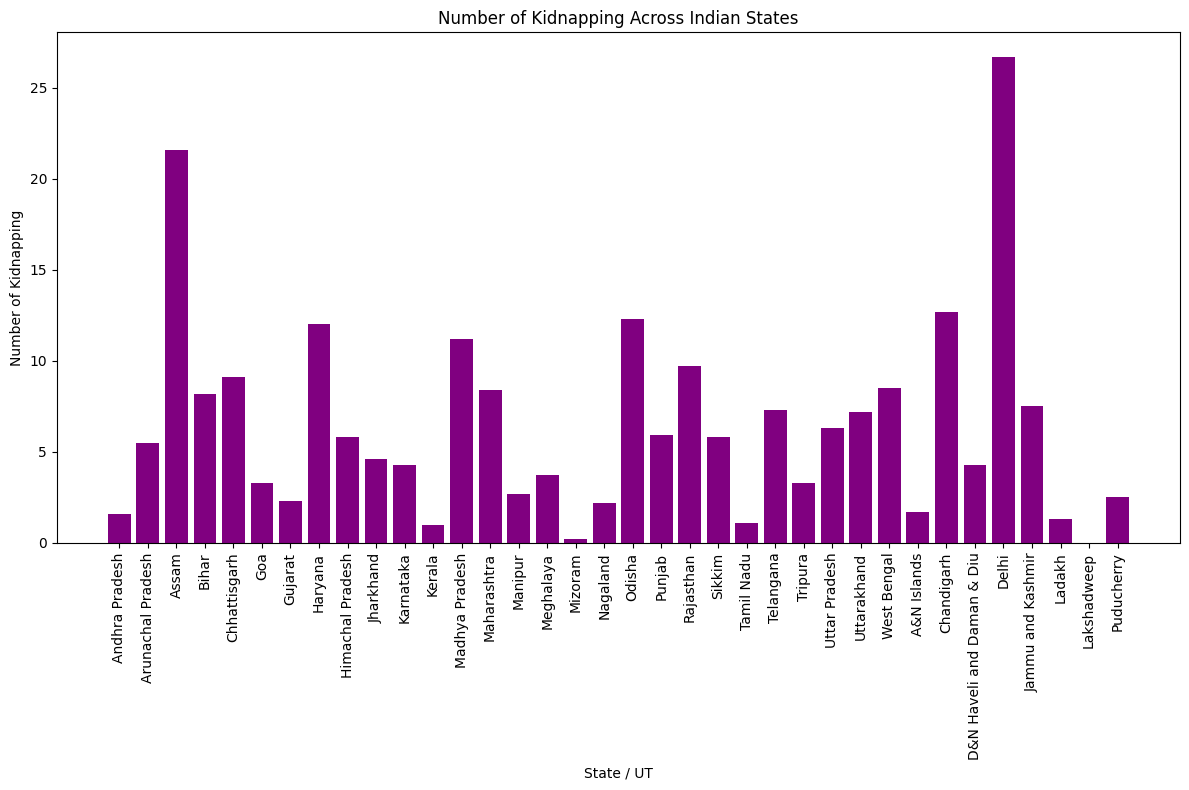

In [75]:
# Retrieve state names and the number of Kidnapping
state_names = df1['State / UT']
kidnapping_counts = df1['Kidnapping']
# Create a bar plot for 'Kidnapping'
plt.figure(figsize=(12, 8))
plt.bar(state_names, kidnapping_counts, color='purple')
plt.xlabel('State / UT')
plt.ylabel('Number of Kidnapping')
plt.title('Number of Kidnapping Across Indian States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

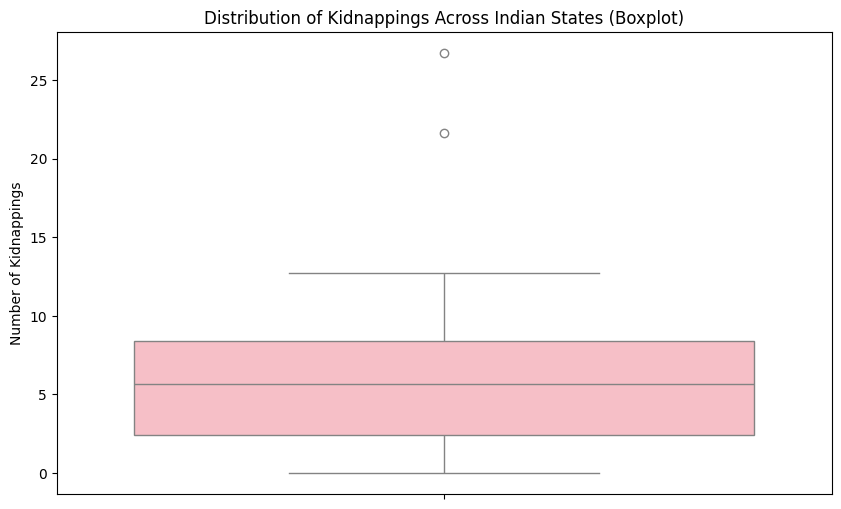

In [76]:
# Create a boxplot for Kidnapping
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Kidnapping', color='lightpink')
plt.title('Distribution of Kidnappings Across Indian States (Boxplot)')
plt.ylabel('Number of Kidnappings')
plt.show()

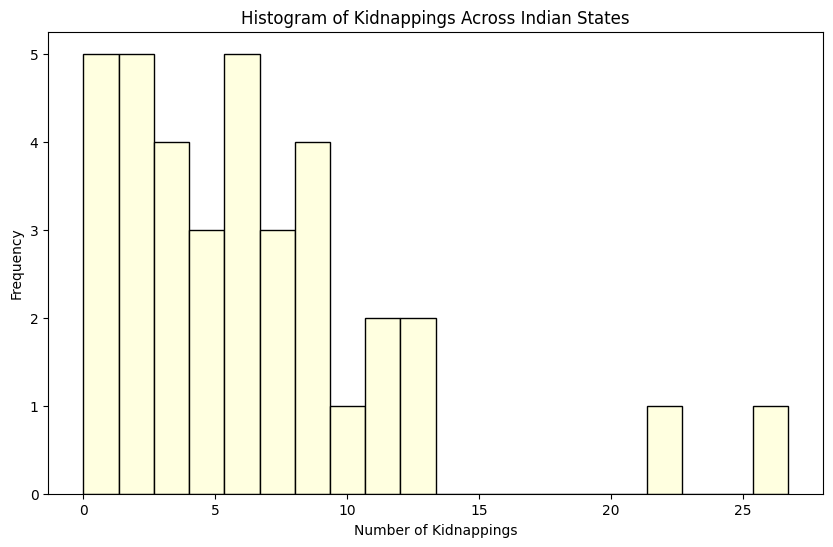

In [77]:
# Create a histogram for Kidnappings
plt.figure(figsize=(10, 6))
plt.hist(df1['Kidnapping'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Histogram of Kidnappings Across Indian States')
plt.xlabel('Number of Kidnappings')
plt.ylabel('Frequency')
plt.show()

In [78]:
# Top 3 and Bottom 3 states for Crimes Against Children
top_3_states_crimes_against_children = df1.nlargest(3, 'Crimes Against Children')[['State / UT', 'Crimes Against Children']]
top_3_states_crimes_against_children

,State / UT,Crimes Against Children
31,Delhi,128.5
28,A&N Islands,110.4
34,Lakshadweep,85.4


In [79]:
bottom_3_states_crimes_against_children = df1.nsmallest(3, 'Crimes Against Children')[['State / UT', 'Crimes Against Children']]
bottom_3_states_crimes_against_children

,State / UT,Crimes Against Children
33,Ladakh,1.2
17,Nagaland,6.2
9,Jharkhand,13.5


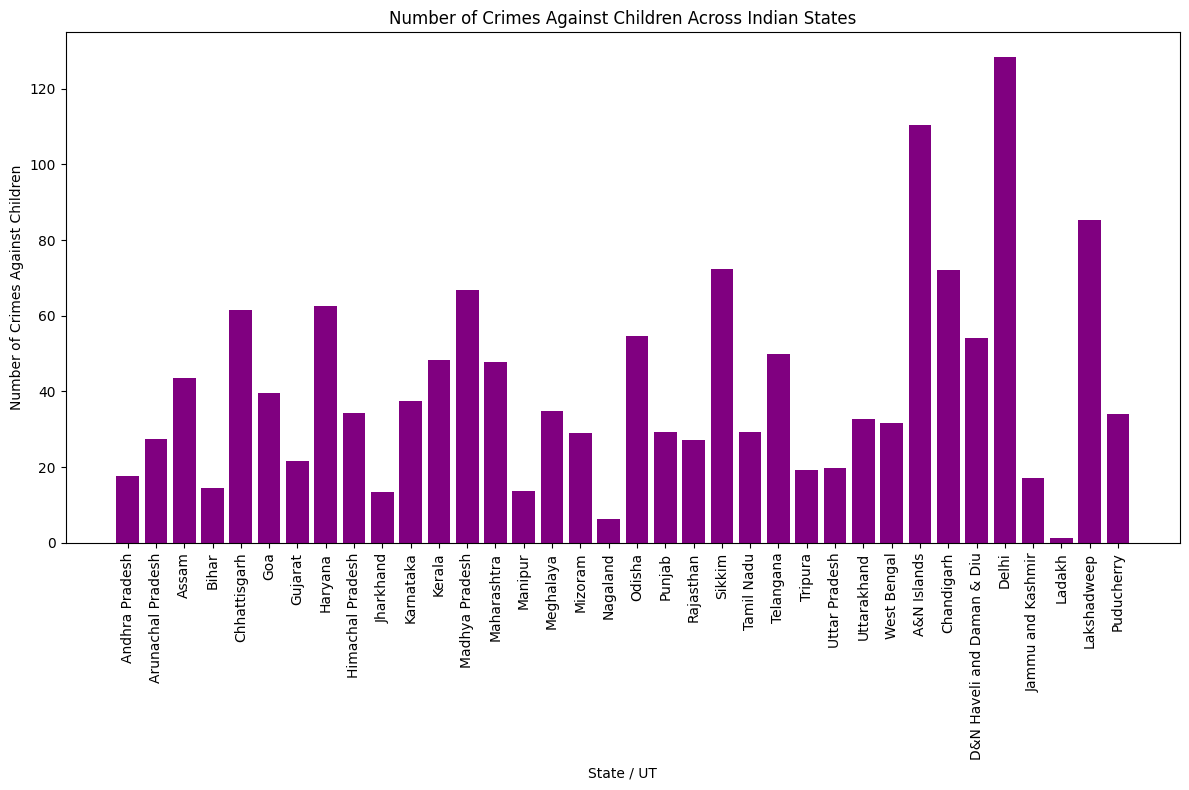

In [80]:
# Retrieve state names and the number of Crimes Against Children
state_names = df1['State / UT']
crimes_against_children_counts = df1['Crimes Against Children']
# Create a bar plot for Crimes Against Children
plt.figure(figsize=(12, 8))
plt.bar(state_names, crimes_against_children_counts, color='purple')
plt.xlabel('State / UT')
plt.ylabel('Number of Crimes Against Children')
plt.title('Number of Crimes Against Children Across Indian States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

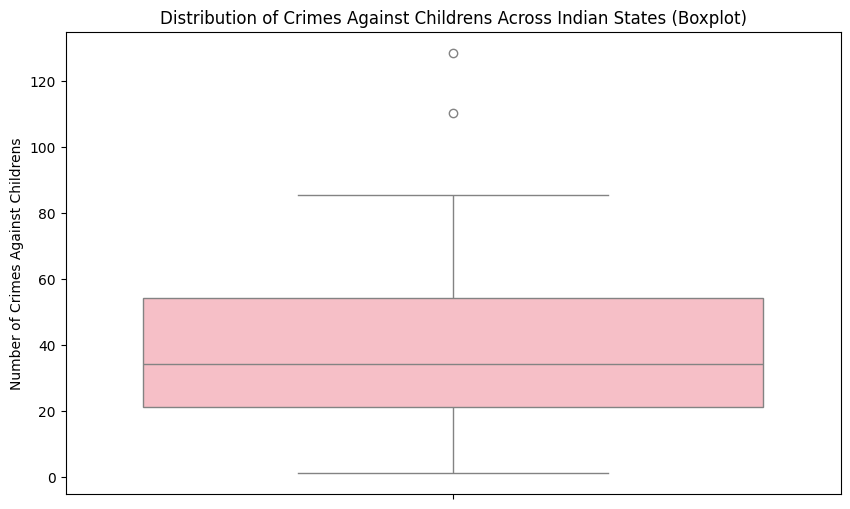

In [81]:
# Create a boxplot for Crimes Against Children
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Crimes Against Children', color='lightpink')
plt.title('Distribution of Crimes Against Childrens Across Indian States (Boxplot)')
plt.ylabel('Number of Crimes Against Childrens')
plt.show()

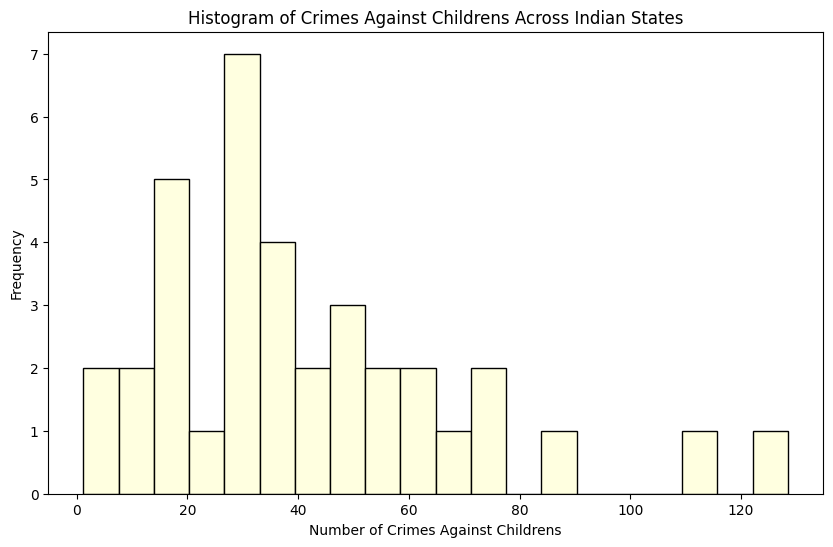

In [82]:
# Create a histogram for Crimes Against Childrens
plt.figure(figsize=(10, 6))
plt.hist(df1['Crimes Against Children'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Histogram of Crimes Against Childrens Across Indian States')
plt.xlabel('Number of Crimes Against Childrens')
plt.ylabel('Frequency')
plt.show()

In [83]:
# Top 3 and Bottom 3 states for Extortion
top_3_states_extortion = df1.nlargest(3, 'Extortion')[['State / UT', 'Extortion']]
top_3_states_extortion

,State / UT,Extortion
17,Nagaland,7.2
1,Arunachal Pradesh,5.3
2,Assam,3.9


In [84]:
bottom_3_states_extortion = df1.nsmallest(3, 'Extortion')[['State / UT', 'Extortion']]
bottom_3_states_extortion

,State / UT,Extortion
32,Jammu and Kashmir,0.0
34,Lakshadweep,0.0
8,Himachal Pradesh,0.1


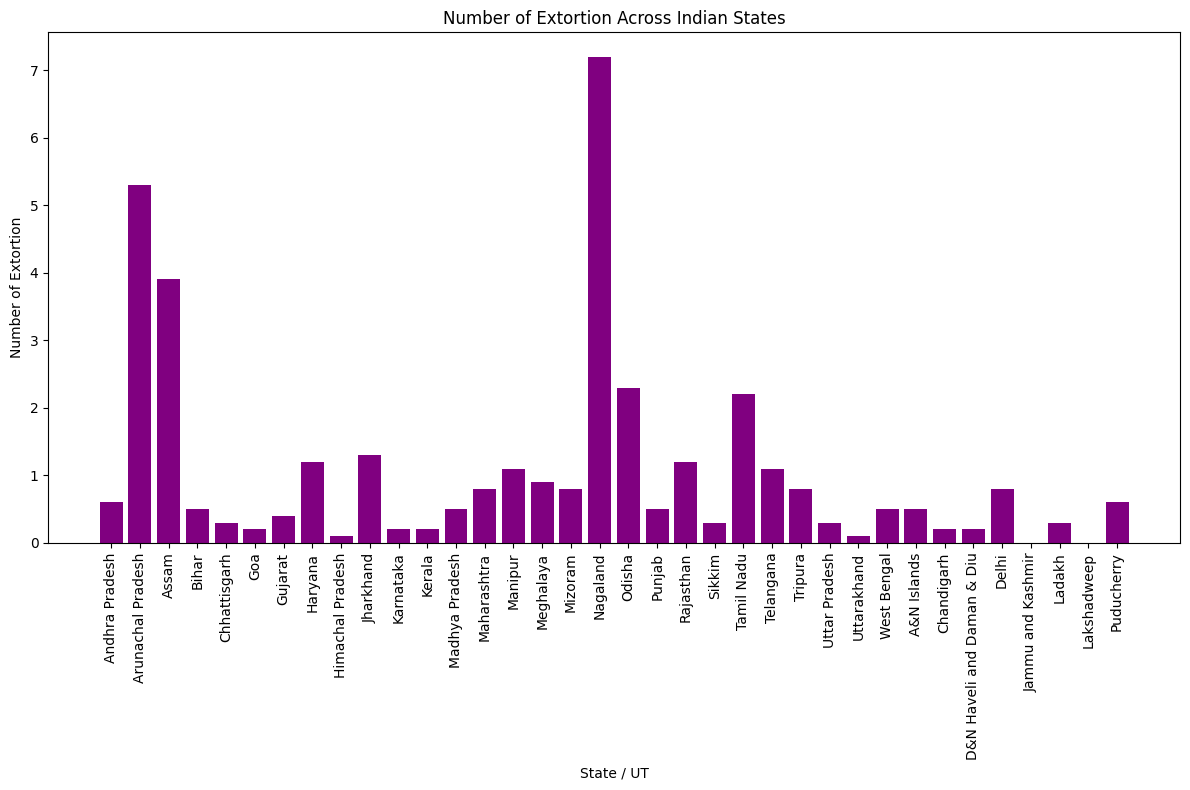

In [85]:
# Retrieve state names and the number of Extortion
state_names = df1['State / UT']
Extortion_counts = df1['Extortion']
# Create a bar plot for Extortion
plt.figure(figsize=(12, 8))
plt.bar(state_names, Extortion_counts, color='purple')
plt.xlabel('State / UT')
plt.ylabel('Number of Extortion')
plt.title('Number of Extortion Across Indian States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

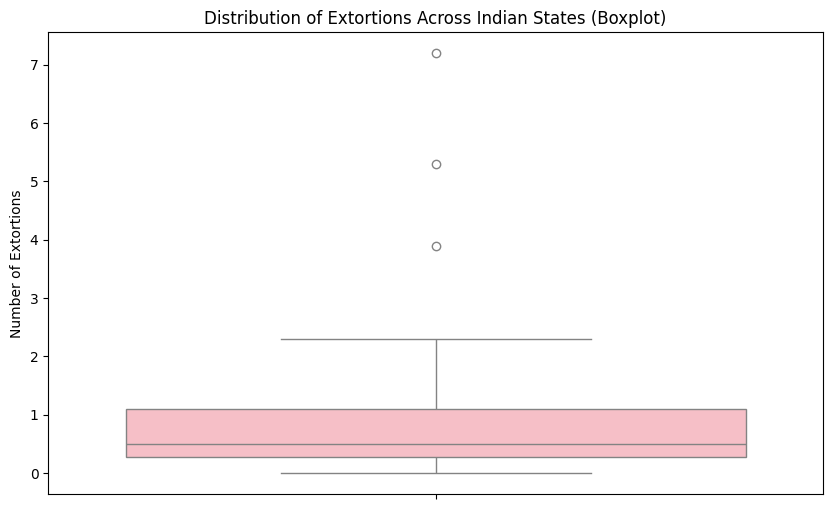

In [86]:
# Create a boxplot for Extortion
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Extortion', color='lightpink')
plt.title('Distribution of Extortions Across Indian States (Boxplot)')
plt.ylabel('Number of Extortions')
plt.show()

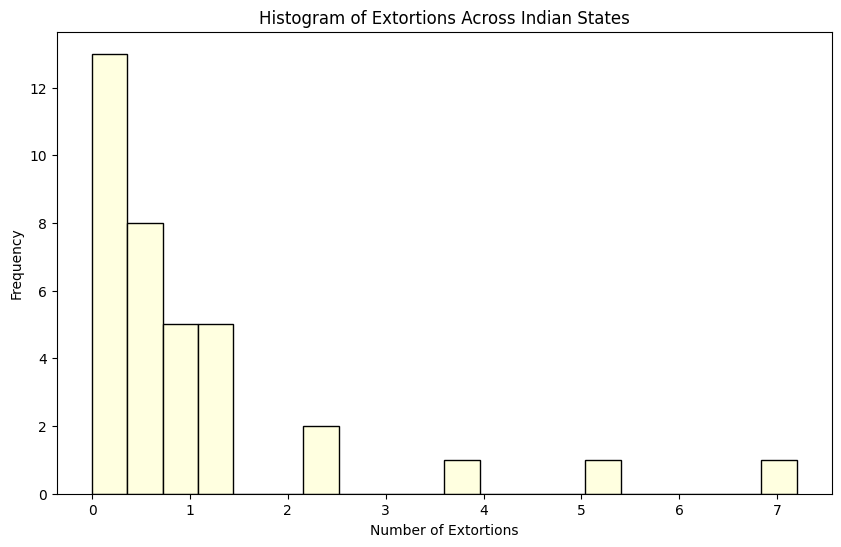

In [87]:
# Create a histogram for Extortions
plt.figure(figsize=(10, 6))
plt.hist(df1['Extortion'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Histogram of Extortions Across Indian States')
plt.xlabel('Number of Extortions')
plt.ylabel('Frequency')
plt.show()

In [88]:
# Top 3 and Bottom 3 states for Robbery
top_3_states_robbery = df1.nlargest(3, 'Robbery')[['State / UT', 'Robbery']]
top_3_states_robbery

,State / UT,Robbery
31,Delhi,11.3
18,Odisha,6.1
2,Assam,5.4


In [89]:
bottom_3_states_robbery = df1.nsmallest(3, 'Robbery')[['State / UT', 'Robbery']]
bottom_3_states_robbery

,State / UT,Robbery
33,Ladakh,0.0
34,Lakshadweep,0.0
8,Himachal Pradesh,0.1


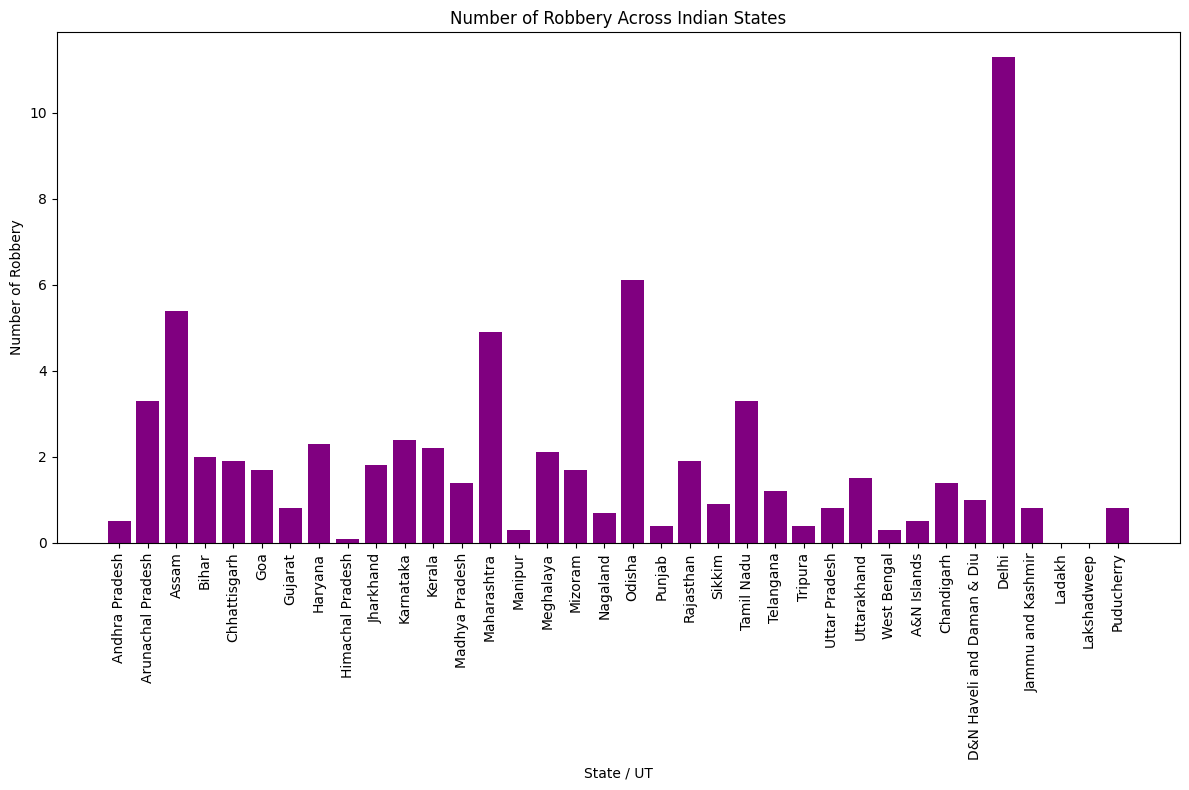

In [90]:
# Retrieve state names and the number of Robbery
state_names = df1['State / UT']
Robbery_counts = df1['Robbery']
# Create a bar plot for Robbery
plt.figure(figsize=(12, 8))
plt.bar(state_names, Robbery_counts, color='purple')
plt.xlabel('State / UT')
plt.ylabel('Number of Robbery')
plt.title('Number of Robbery Across Indian States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

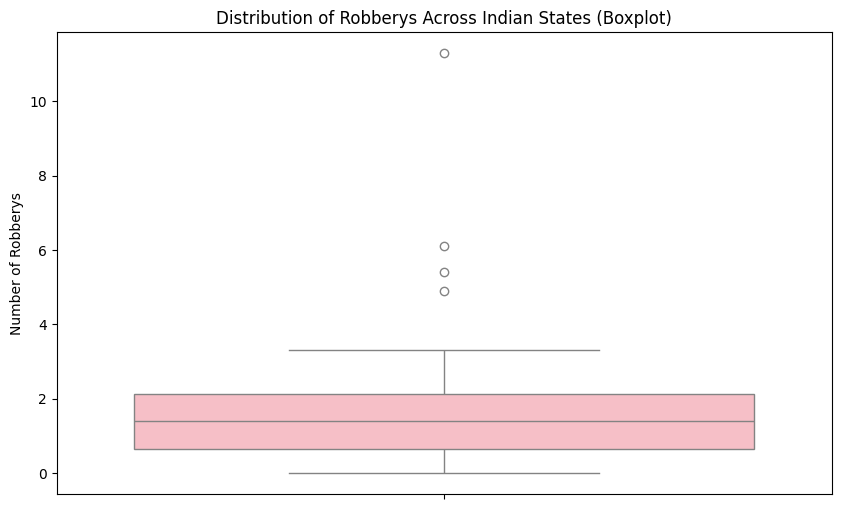

In [91]:
# Create a boxplot for Robbery
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Robbery', color='lightpink')
plt.title('Distribution of Robberys Across Indian States (Boxplot)')
plt.ylabel('Number of Robberys')
plt.show()

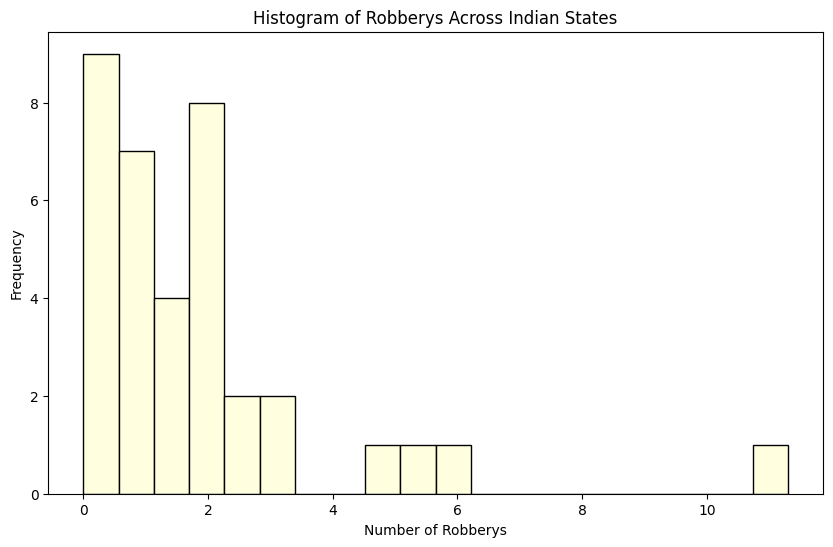

In [92]:
# Create a histogram for Robberys
plt.figure(figsize=(10, 6))
plt.hist(df1['Robbery'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Histogram of Robberys Across Indian States')
plt.xlabel('Number of Robberys')
plt.ylabel('Frequency')
plt.show()

In [93]:
# Top 3 and Bottom 3 states for Hit & Run
top_3_states_hit_and_run = df1.nlargest(3, 'Hit & Run')[['State / UT', 'Hit & Run']]
top_3_states_hit_and_run

,State / UT,Hit & Run
12,Madhya Pradesh,8.8
25,Uttar Pradesh,6.3
4,Chhattisgarh,6.0


In [94]:
bottom_3_states_hit_and_run = df1.nsmallest(3, 'Hit & Run')[['State / UT', 'Hit & Run']]
bottom_3_states_hit_and_run

,State / UT,Hit & Run
34,Lakshadweep,0.0
35,Puducherry,0.0
27,West Bengal,0.1


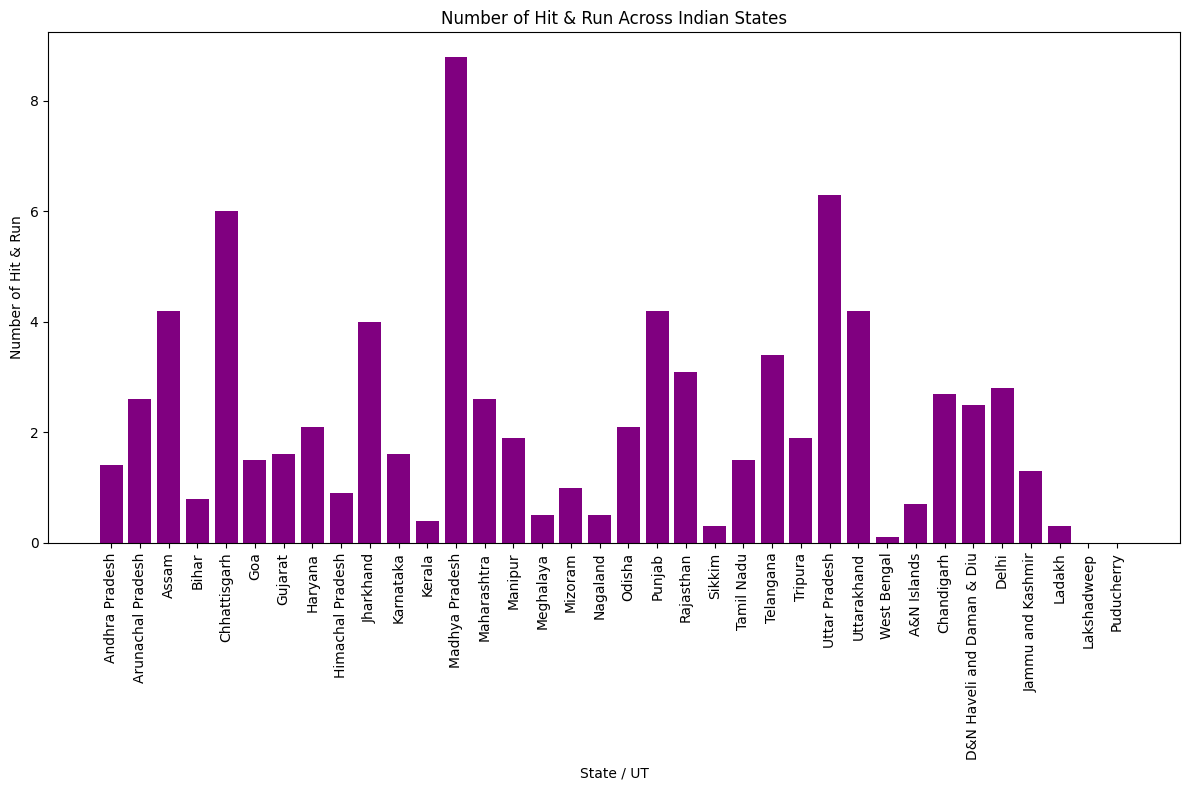

In [95]:
# Retrieve state names and the number of Hit & Run
state_names = df1['State / UT']
Hit_hit_and_run_counts = df1['Hit & Run']
# Create a bar plot for Hit & Run
plt.figure(figsize=(12, 8))
plt.bar(state_names, Hit_hit_and_run_counts, color='purple')
plt.xlabel('State / UT')
plt.ylabel('Number of Hit & Run')
plt.title('Number of Hit & Run Across Indian States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

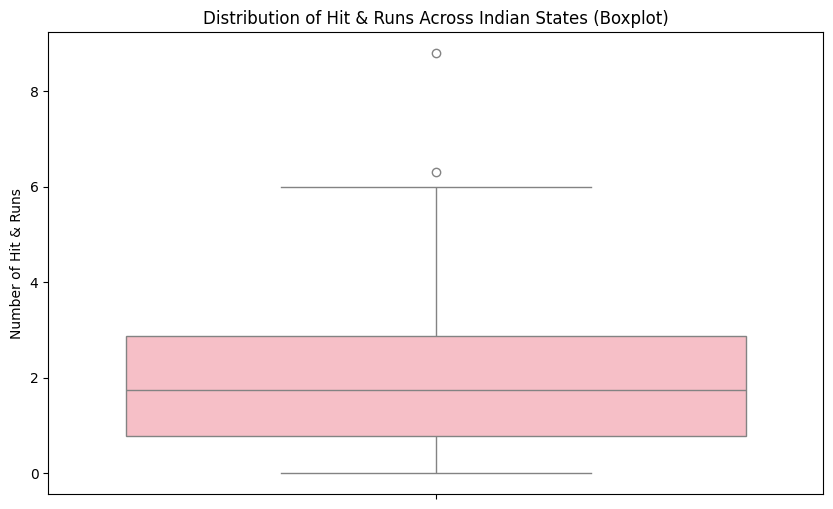

In [96]:
# Create a boxplot for Hit & Run
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Hit & Run', color='lightpink')
plt.title('Distribution of Hit & Runs Across Indian States (Boxplot)')
plt.ylabel('Number of Hit & Runs')
plt.show()

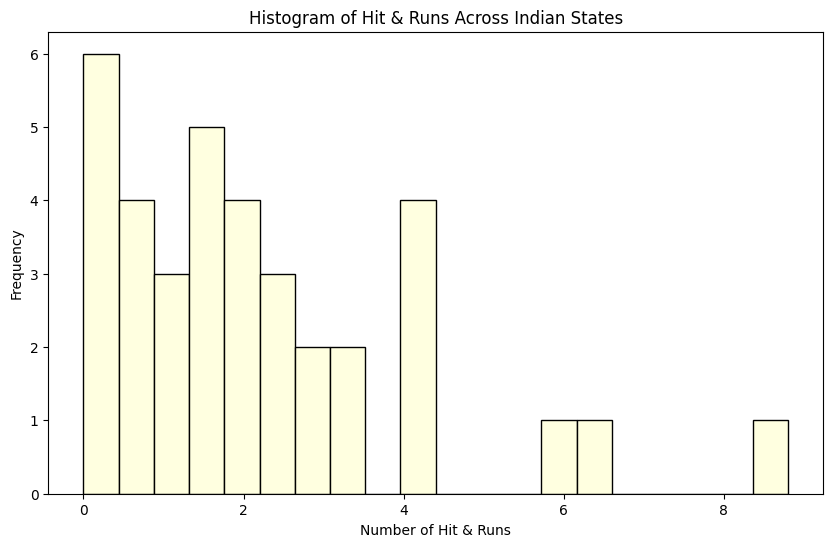

In [97]:
# Create a histogram for Hit & Runs
plt.figure(figsize=(10, 6))
plt.hist(df1['Hit & Run'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Histogram of Hit & Runs Across Indian States')
plt.xlabel('Number of Hit & Runs')
plt.ylabel('Frequency')
plt.show()

In [98]:
# Top 3 and Bottom 3 states for Drugs Trafficking
top_3_states_drugs_trafficking = df1.nlargest(3, 'Drugs Trafficking')[['State / UT', 'Drugs Trafficking']]
top_3_states_drugs_trafficking

,State / UT,Drugs Trafficking
19,Punjab,19.0
8,Himachal Pradesh,14.7
32,Jammu and Kashmir,9.9


In [99]:
bottom_3_states_drugs_trafficking = df1.nsmallest(3, 'Drugs Trafficking')[['State / UT', 'Drugs Trafficking']]
bottom_3_states_drugs_trafficking

,State / UT,Drugs Trafficking
30,D&N Haveli and Daman & Diu,0.0
3,Bihar,0.2
6,Gujarat,0.4


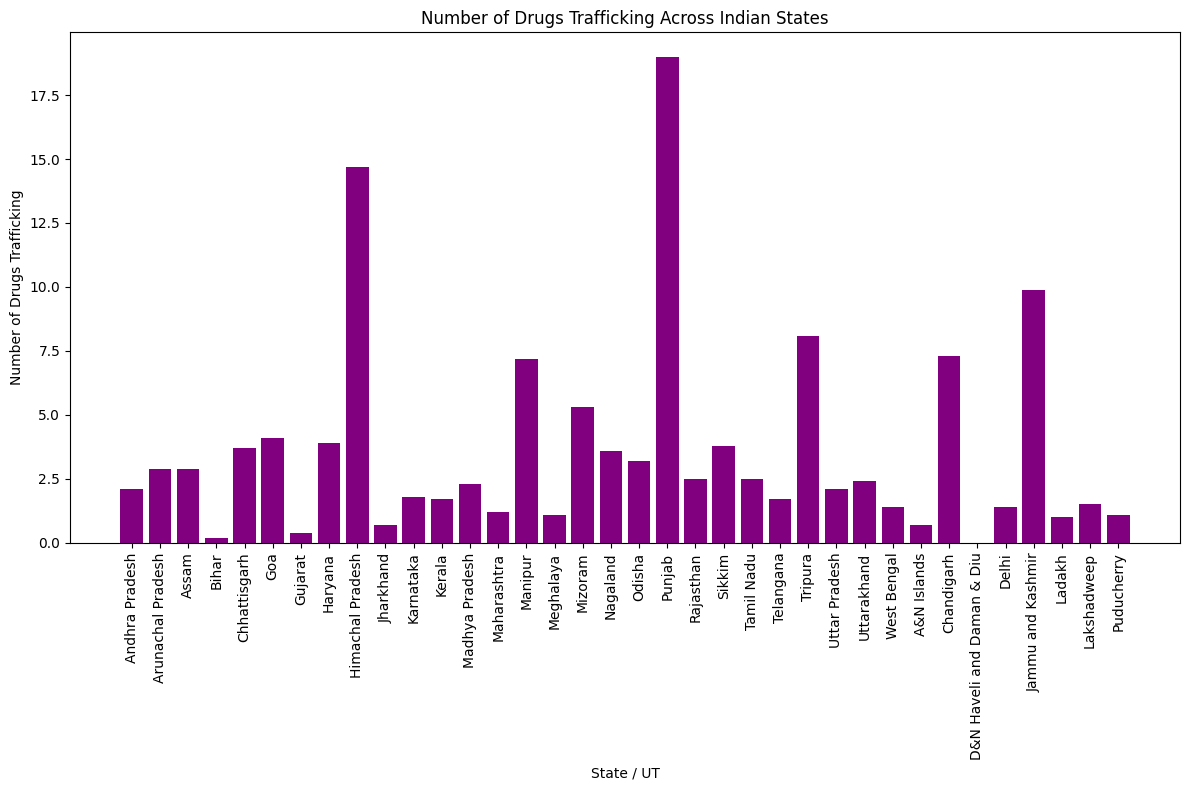

In [100]:
# Retrieve state names and the number of Drugs Trafficking
state_names = df1['State / UT']
Drugs_Trafficking_counts = df1['Drugs Trafficking']
# Create a bar plot for Drugs Trafficking
plt.figure(figsize=(12, 8))
plt.bar(state_names, Drugs_Trafficking_counts, color='purple')
plt.xlabel('State / UT')
plt.ylabel('Number of Drugs Trafficking')
plt.title('Number of Drugs Trafficking Across Indian States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

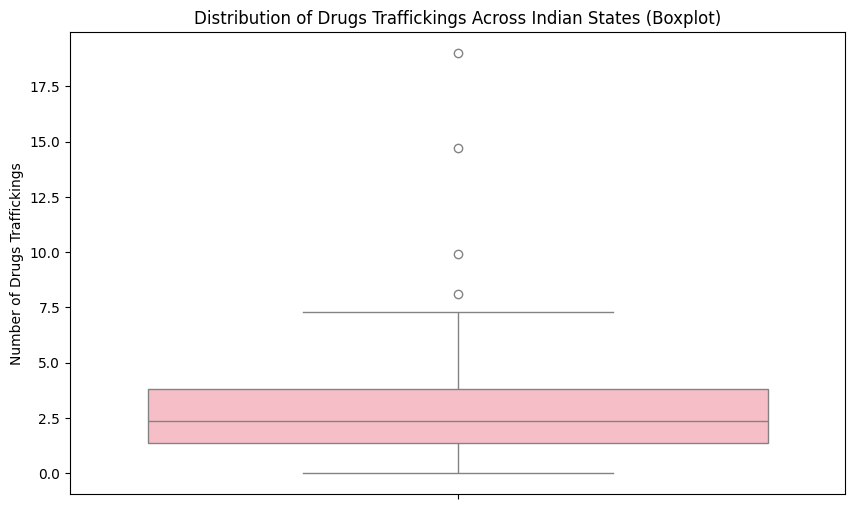

In [101]:
# Create a boxplot for Drugs Trafficking
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Drugs Trafficking', color='lightpink')
plt.title('Distribution of Drugs Traffickings Across Indian States (Boxplot)')
plt.ylabel('Number of Drugs Traffickings')
plt.show()

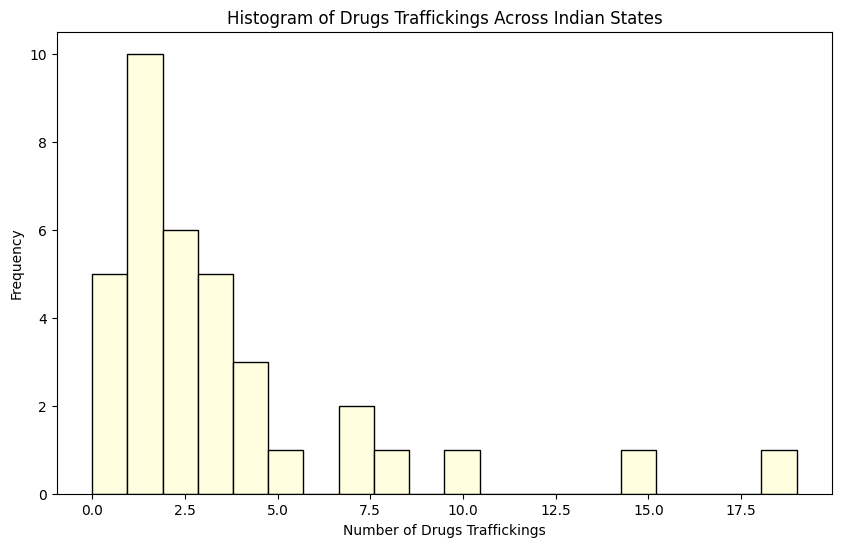

In [102]:
# Create a histogram for Drugs Traffickings
plt.figure(figsize=(10, 6))
plt.hist(df1['Drugs Trafficking'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Histogram of Drugs Traffickings Across Indian States')
plt.xlabel('Number of Drugs Traffickings')
plt.ylabel('Frequency')
plt.show()

In [103]:
# Top 3 and Bottom 3 states for Illegal Arms
top_3_states_illegal_arms = df1.nlargest(3, 'Illegal Arms')[['State / UT', 'Illegal Arms']]
top_3_states_illegal_arms

,State / UT,Illegal Arms
25,Uttar Pradesh,11.8
7,Haryana,7.7
26,Uttarakhand,7.3


In [104]:
bottom_3_states_illegal_arms = df1.nsmallest(3, 'Illegal Arms')[['State / UT', 'Illegal Arms']]
bottom_3_states_illegal_arms

,State / UT,Illegal Arms
21,Sikkim,0.0
28,A&N Islands,0.0
30,D&N Haveli and Daman & Diu,0.0


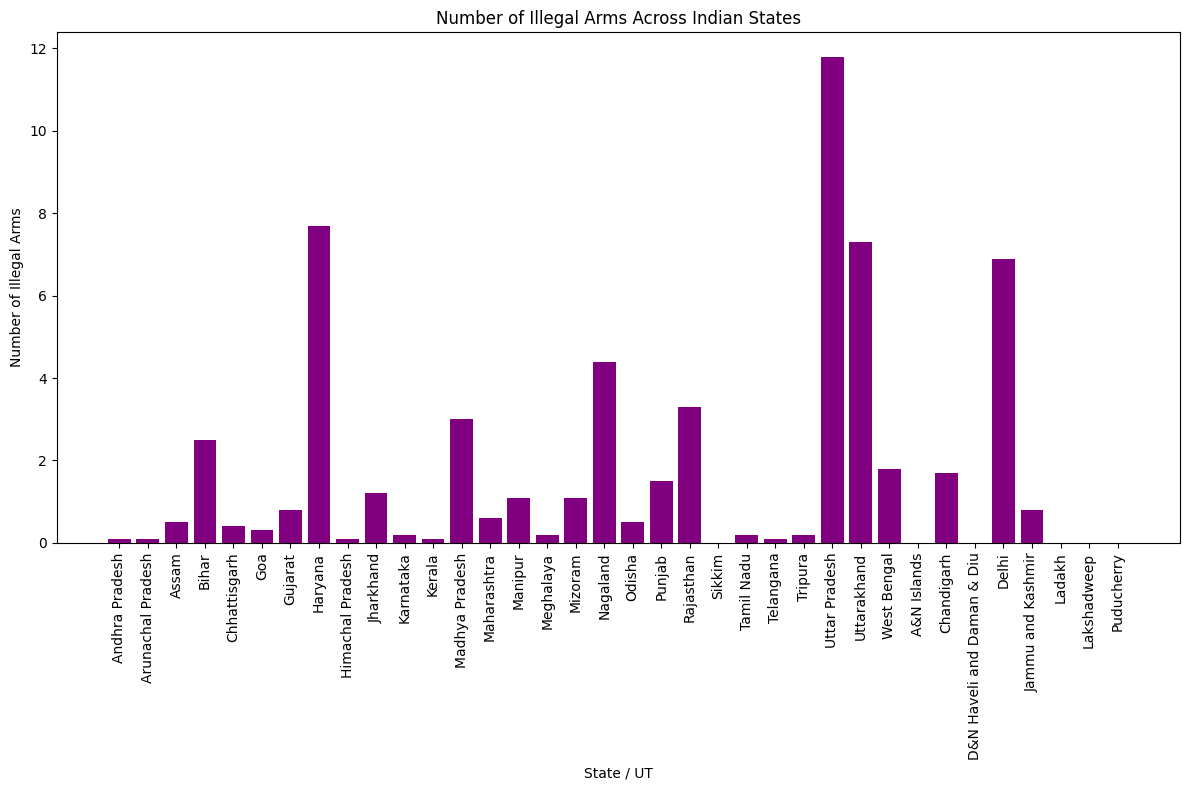

In [105]:
# Retrieve state names and the number of Illegal Arms
state_names = df1['State / UT']
Illegal_Arms_counts = df1['Illegal Arms']
# Create a bar plot for Illegal Arms
plt.figure(figsize=(12, 8))
plt.bar(state_names, Illegal_Arms_counts, color='purple')
plt.xlabel('State / UT')
plt.ylabel('Number of Illegal Arms')
plt.title('Number of Illegal Arms Across Indian States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

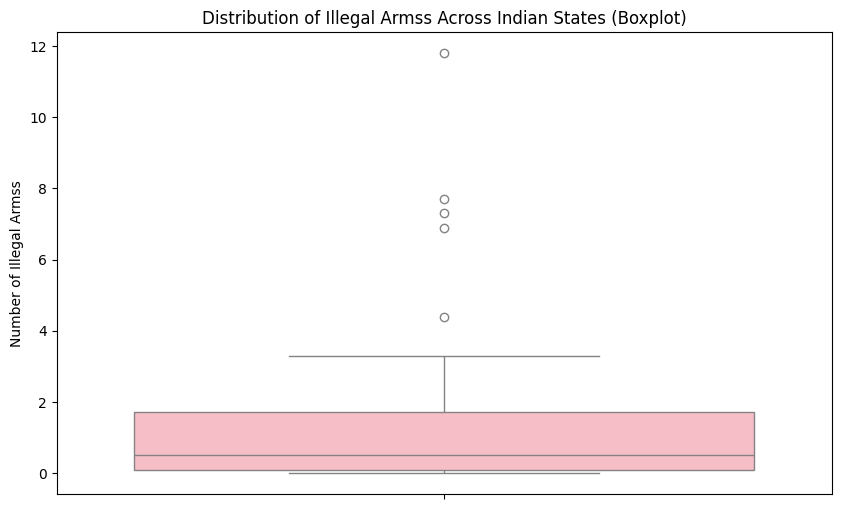

In [106]:
# Create a boxplot for Drugs Illegal Arms
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, y='Illegal Arms', color='lightpink')
plt.title('Distribution of Illegal Armss Across Indian States (Boxplot)')
plt.ylabel('Number of Illegal Armss')
plt.show()

In [107]:
df1.columns

Index(['State / UT', 'Violent Crimes', 'Murder', 'Rape', 'Kidnapping',
       'Crimes Against Children', 'Extortion', 'Robbery', 'Hit & Run',
       'Drugs Trafficking', 'Illegal Arms', 'State_Literacy_rate'],
      dtype='object')

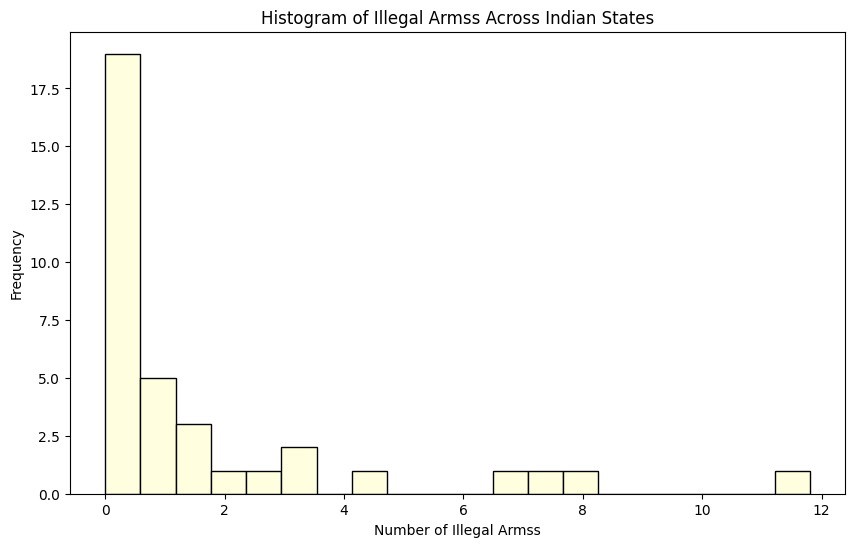

In [108]:
# Create a histogram for Illegal Armss
plt.figure(figsize=(10, 6))
plt.hist(df1['Illegal Arms'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Histogram of Illegal Armss Across Indian States')
plt.xlabel('Number of Illegal Armss')
plt.ylabel('Frequency')
plt.show()

# 3) Analysis of year-on-year total crime rate in India

In [109]:
# For this Task we use DataFame first
df.head()

,State,Area,Population,State_Literacy_rate,Total_Crime,Crime rate 2018,Crime rate 2019,Crime rate 2020,Crime rate 2021
0,ANDHRA PRADESH,162975,53156000,133,750758,278,279,453,420
1,ARUNACHAL PRADESH,83743,1562000,133,11236,189,191,165,198
2,ASSAM,78438,35713000,171,508203,354,386,350,379
3,BIHAR,94163,126756000,140,282148,222,224,211,228
4,CHHATTISGARH,135192,30180000,172,408600,345,335,353,374


In [110]:
df.columns

Index(['State ', 'Area ', 'Population', 'State_Literacy_rate', 'Total_Crime ',
       'Crime rate 2018', 'Crime rate 2019', 'Crime rate 2020',
       'Crime rate 2021'],
      dtype='object')

# Calculate Total Crime Rate for Each Year

In [111]:
# Calculate total crime rate for each year
total_crime_rate_2018 = df['Crime rate 2018'].sum()
total_crime_rate_2019 = df['Crime rate 2019'].sum()
total_crime_rate_2020 = df['Crime rate 2020'].sum()
total_crime_rate_2021 = df['Crime rate 2021'].sum()

# Create lists to store the total crime rates and corresponding years
years = ['2018', '2019', '2020', '2021']
total_crime_rates = [total_crime_rate_2018, total_crime_rate_2019, total_crime_rate_2020, total_crime_rate_2021]

# Print the total crime rates for each year
for year, crime_rate in zip(years, total_crime_rates):
    print(f"Total crime rate for {year}: {crime_rate}")


Total crime rate for 2018: 10742
Total crime rate for 2019: 10738
Total crime rate for 2020: 12952
Total crime rate for 2021: 12028


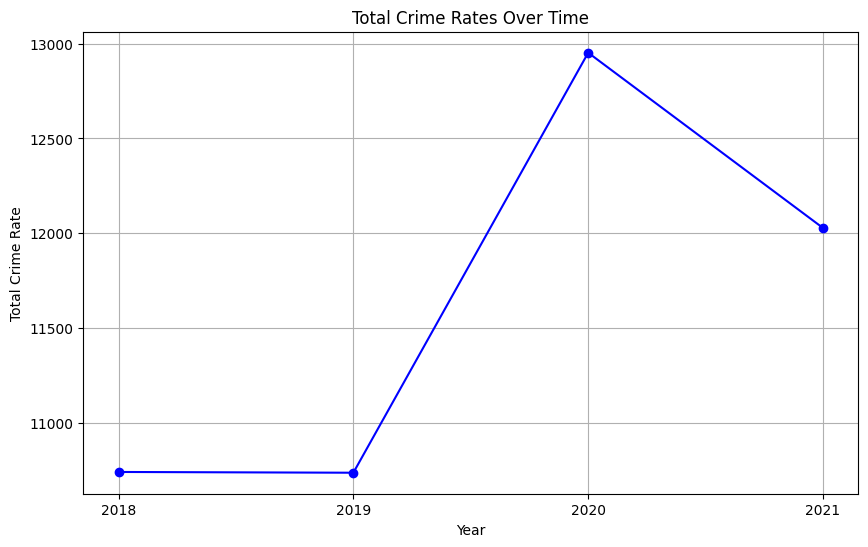

In [112]:
# Plot total crime rates over time
plt.figure(figsize=(10, 6))
plt.plot(years, total_crime_rates, marker='o', color='blue', linestyle='-')
plt.title('Total Crime Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Total Crime Rate')
plt.grid(True)
plt.show()

In [113]:
# Calculate state-wise total crime rate
state_wise_total_crime_rate = df.groupby('State ')['Total_Crime '].sum()
state_wise_total_crime_rate

State 
A & N ISLANDS          11607
ANDHRA PRADESH        750758
ARUNACHAL PRADESH      11236
ASSAM                 508203
BIHAR                 282148
CHANDIGARH             16734
CHHATTISGARH          408600
D & N HAVELI            2421
DELHI                1151332
GOA                    14968
GUJARAT              2255617
HARYANA               756391
HIMACHAL PRADESH       78981
JAMMU & KASHMIR       113270
JHARKHAND             242205
KARNATAKA             640884
KERALA               1544934
LADHAKH                  962
LAKSHADWEEP              534
MADHYA PRADESH       1704712
MAHARASHTRA          2104920
MANIPUR                13632
MEGHALAYA              13632
MIZORAM                10716
NAGALAND                6425
ODISHA                518583
PUNDUCHERRY            21213
PUNJAB                299629
RAJASTHAN            1099887
SIKKIM                  3093
TAMIL NADU           3088716
TELANGANA             564425
TRIPURA                21507
UTTAR PRADESH        2479742
UTTARAK

In [114]:
# Top 3 states in India for Crimes
top_3_states_Crimes = df.nlargest(3, 'Total_Crime ')[['State ', 'Total_Crime ']]
top_3_states_Crimes

,State,Total_Crime
22,TAMIL NADU,3088716
25,UTTAR PRADESH,2479742
6,GUJARAT,2255617


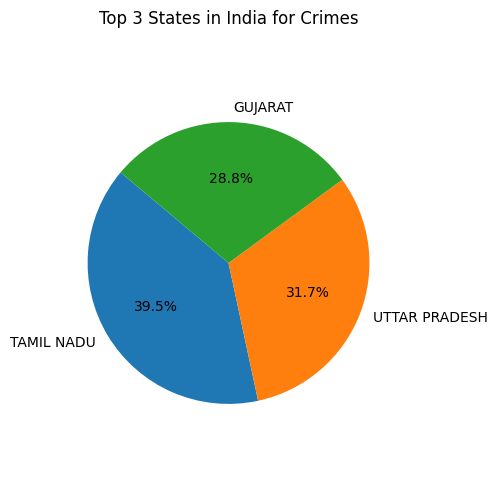

In [115]:
# Extract state names and total crime counts for the top 3 states
state_names = top_3_states_Crimes['State ']
crime_counts = top_3_states_Crimes['Total_Crime ']

# Plot the pie chart
plt.figure(figsize=(4, 6))
plt.pie(crime_counts, labels=state_names, autopct='%1.1f%%', startangle=140)
plt.title('Top 3 States in India for Crimes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [116]:
# Bottom 3 States in India for Crime
bottom_3_states_Crimes = df.nsmallest(3, 'Total_Crime ')[['State ', 'Total_Crime ']]
bottom_3_states_Crimes

,State,Total_Crime
33,LAKSHADWEEP,534
32,LADHAKH,962
30,D & N HAVELI,2421


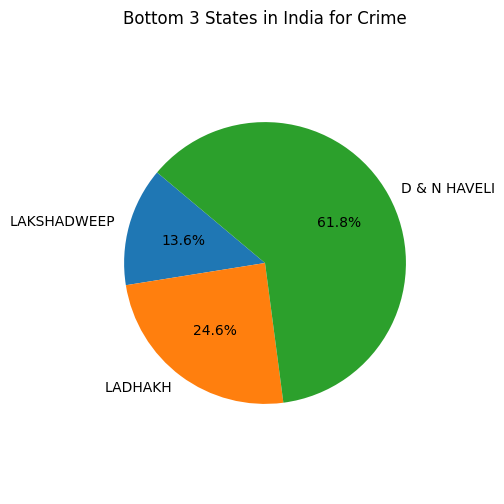

In [117]:
# Extract state names and total crime counts for the bottom 3 states
state_names_bottom = bottom_3_states_Crimes['State ']
crime_counts_bottom = bottom_3_states_Crimes['Total_Crime ']

# Plot the pie chart
plt.figure(figsize=(4, 6))
plt.pie(crime_counts_bottom, labels=state_names_bottom, autopct='%1.1f%%', startangle=140)
plt.title('Bottom 3 States in India for Crime')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

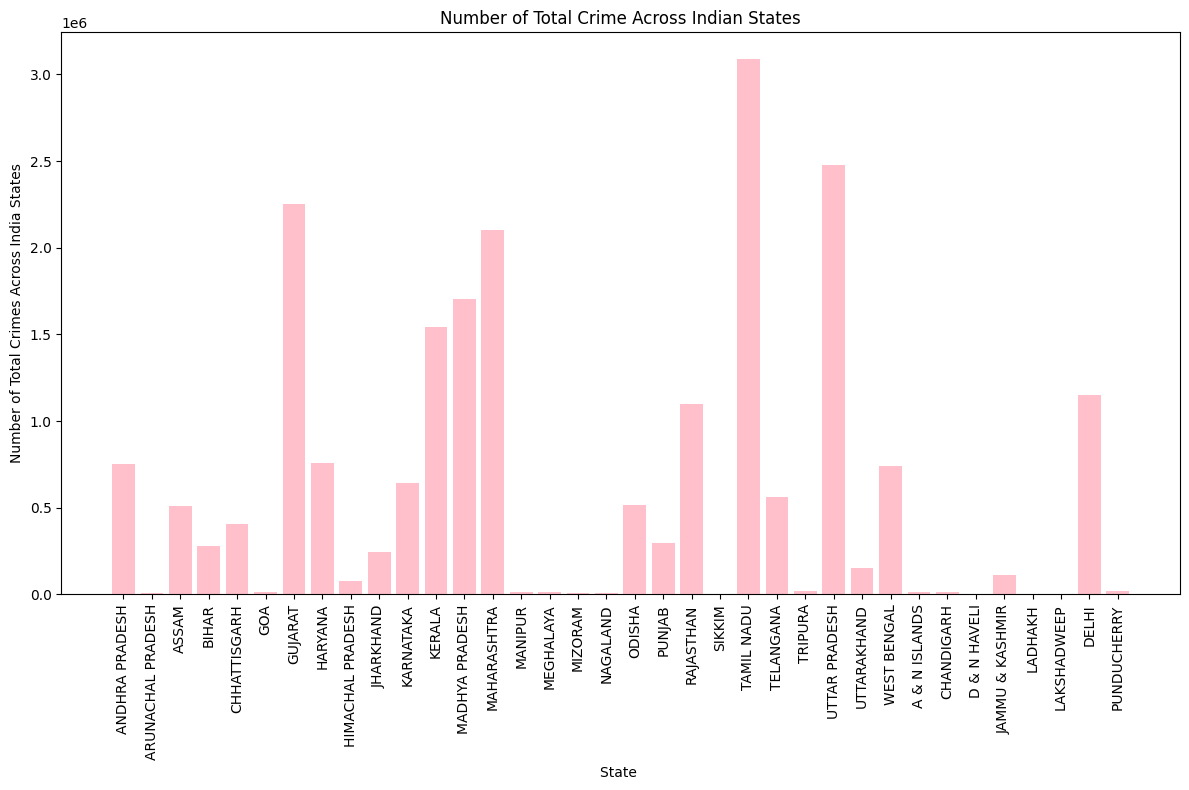

In [118]:
# Retrieve State names and the number of Total Crimes
state_names = df['State ']
Total_Crime_counts = df['Total_Crime ']
# Create a bar plot for Total Crime
plt.figure(figsize=(12, 8))
plt.bar(state_names, Total_Crime_counts, color='pink')
plt.xlabel('State ')
plt.ylabel('Number of Total Crimes Across India States')
plt.title('Number of Total Crime Across Indian States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

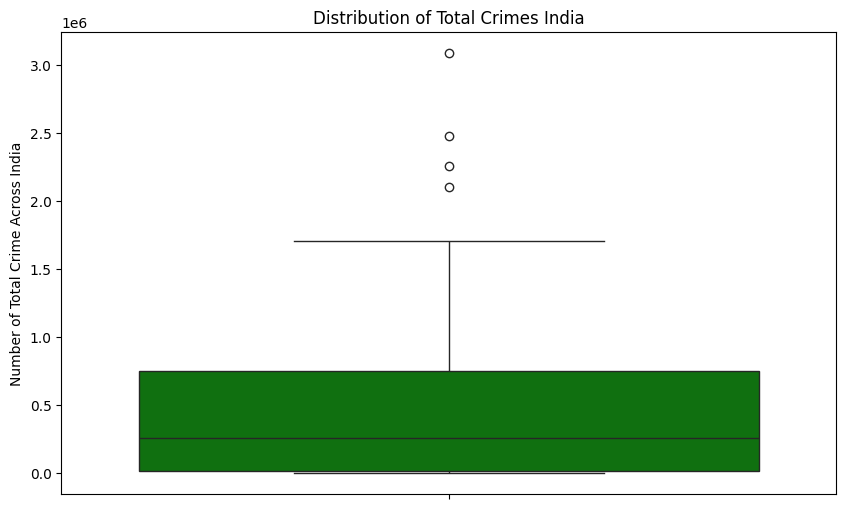

In [119]:
# Create a boxplot for Total Crimes in Staes Across the India
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Total_Crime ', color='g')
plt.title('Distribution of Total Crimes India')
plt.ylabel('Number of Total Crime Across India')
plt.show()

In [120]:
df.columns

Index(['State ', 'Area ', 'Population', 'State_Literacy_rate', 'Total_Crime ',
       'Crime rate 2018', 'Crime rate 2019', 'Crime rate 2020',
       'Crime rate 2021'],
      dtype='object')

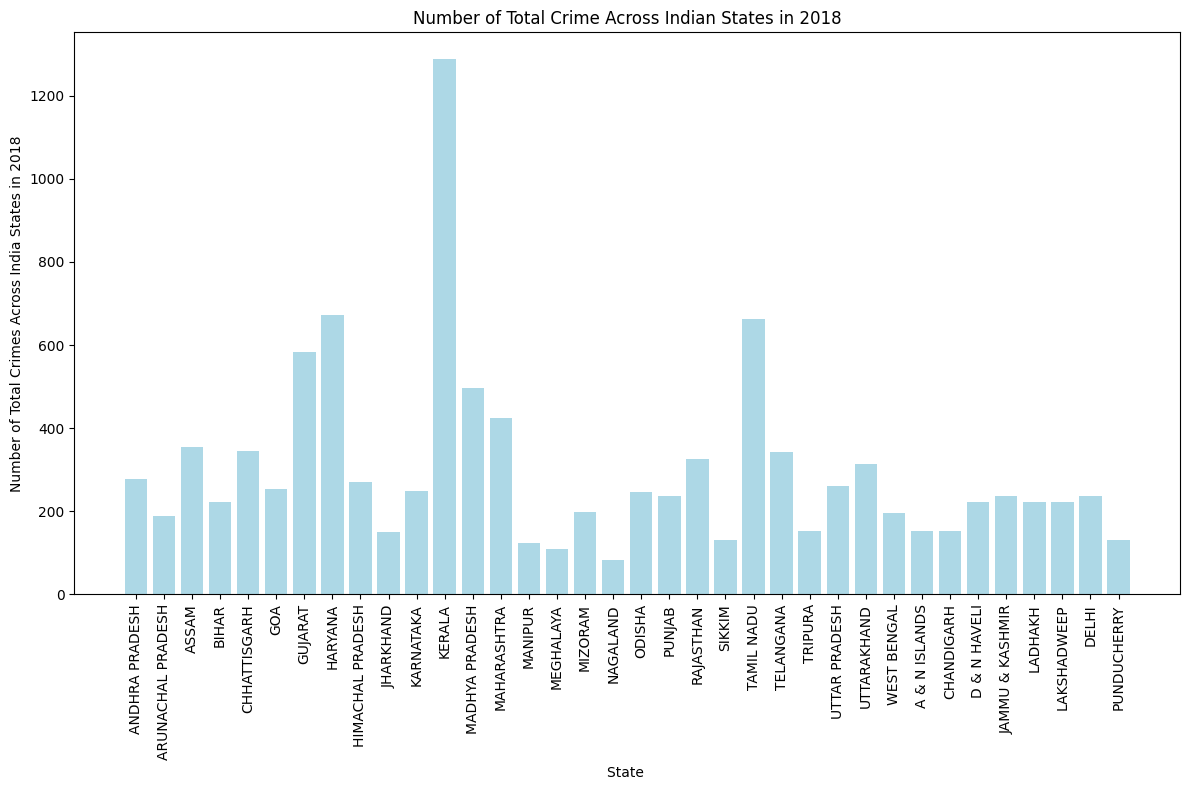

In [121]:
# Retrieve State names and the number of Total Crimes in 2018
state_names = df['State ']
Total_Crime_counts = df['Crime rate 2018']
# Create a bar plot for Total Crime in 2018
plt.figure(figsize=(12, 8))
plt.bar(state_names, Total_Crime_counts, color='lightblue')
plt.xlabel('State ')
plt.ylabel('Number of Total Crimes Across India States in 2018')
plt.title('Number of Total Crime Across Indian States in 2018')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

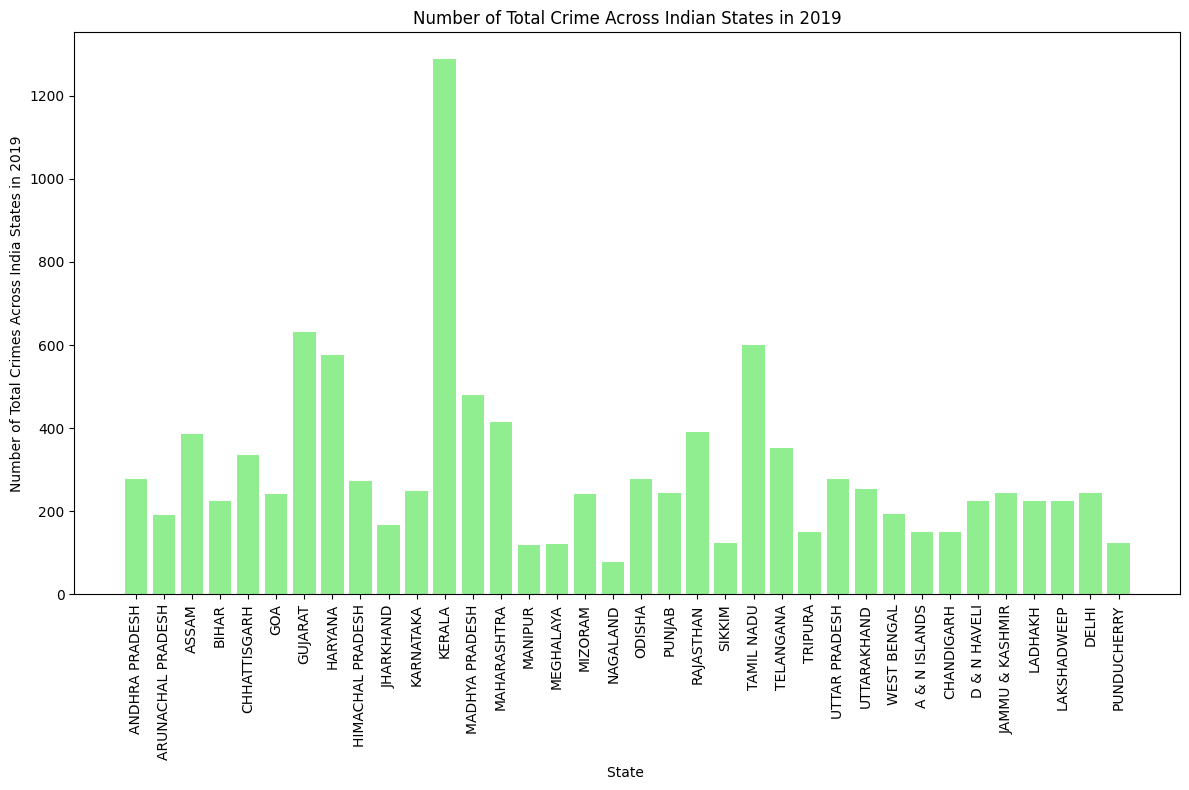

In [122]:
# Retrieve State names and the number of Crimes in 2019
state_names = df['State ']
Total_Crime_counts = df['Crime rate 2019']
# Create a bar plot for Total Crime in 2019
plt.figure(figsize=(12, 8))
plt.bar(state_names, Total_Crime_counts, color='lightgreen')
plt.xlabel('State ')
plt.ylabel('Number of Total Crimes Across India States in 2019')
plt.title('Number of Total Crime Across Indian States in 2019')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

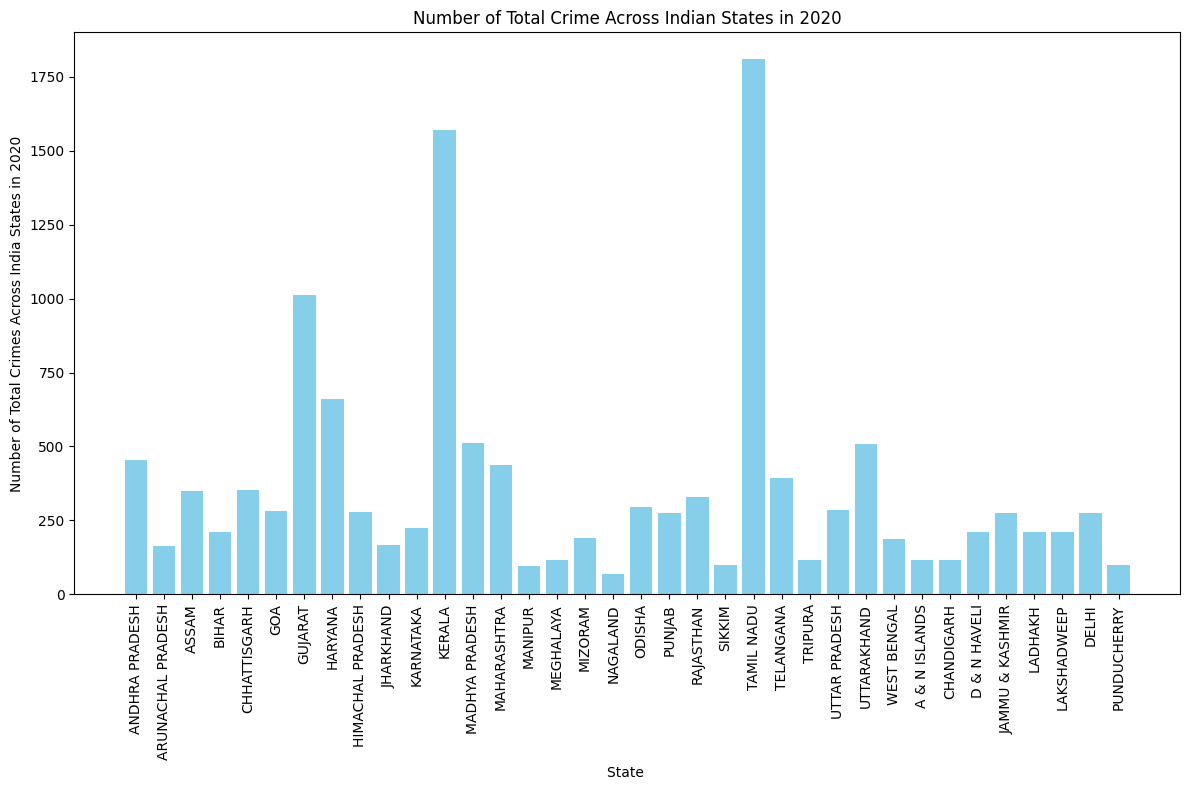

In [123]:
# Retrieve State names and the number of Total Crimes in 2020
state_names = df['State ']
Total_Crime_counts = df['Crime rate 2020']
# Create a bar plot for Total Crime in 2020
plt.figure(figsize=(12, 8))
plt.bar(state_names, Total_Crime_counts, color='skyblue')
plt.xlabel('State ')
plt.ylabel('Number of Total Crimes Across India States in 2020')
plt.title('Number of Total Crime Across Indian States in 2020')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

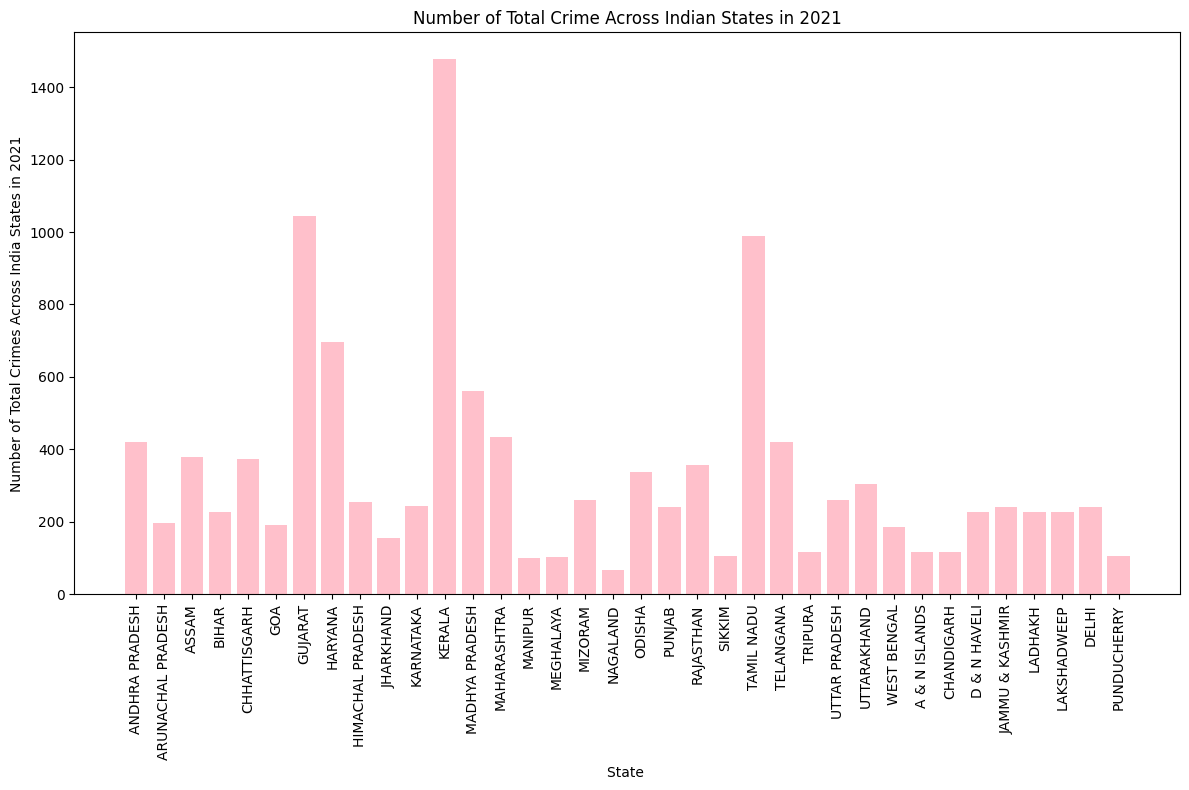

In [124]:
# Retrieve State names and the number of Total Crimes in 2021
state_names = df['State ']
Total_Crime_counts = df['Crime rate 2021']
# Create a bar plot for Total Crime in 2021
plt.figure(figsize=(12, 8))
plt.bar(state_names, Total_Crime_counts, color='pink')
plt.xlabel('State ')
plt.ylabel('Number of Total Crimes Across India States in 2021')
plt.title('Number of Total Crime Across Indian States in 2021')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4) Analysis of area vs overall crime.

In [125]:
df.columns

Index(['State ', 'Area ', 'Population', 'State_Literacy_rate', 'Total_Crime ',
       'Crime rate 2018', 'Crime rate 2019', 'Crime rate 2020',
       'Crime rate 2021'],
      dtype='object')

In [126]:
# Retrieve 'State', 'Area', and 'Total_Crime' rate
state_area_crime = df[['State ', 'Area ', 'Total_Crime ']]
state_area_crime

,State,Area,Total_Crime
0,ANDHRA PRADESH,162975,750758
1,ARUNACHAL PRADESH,83743,11236
2,ASSAM,78438,508203
3,BIHAR,94163,282148
4,CHHATTISGARH,135192,408600
5,GOA,3702,14968
6,GUJARAT,196024,2255617
7,HARYANA,44212,756391
8,HIMACHAL PRADESH,55673,78981
9,JHARKHAND,79716,242205


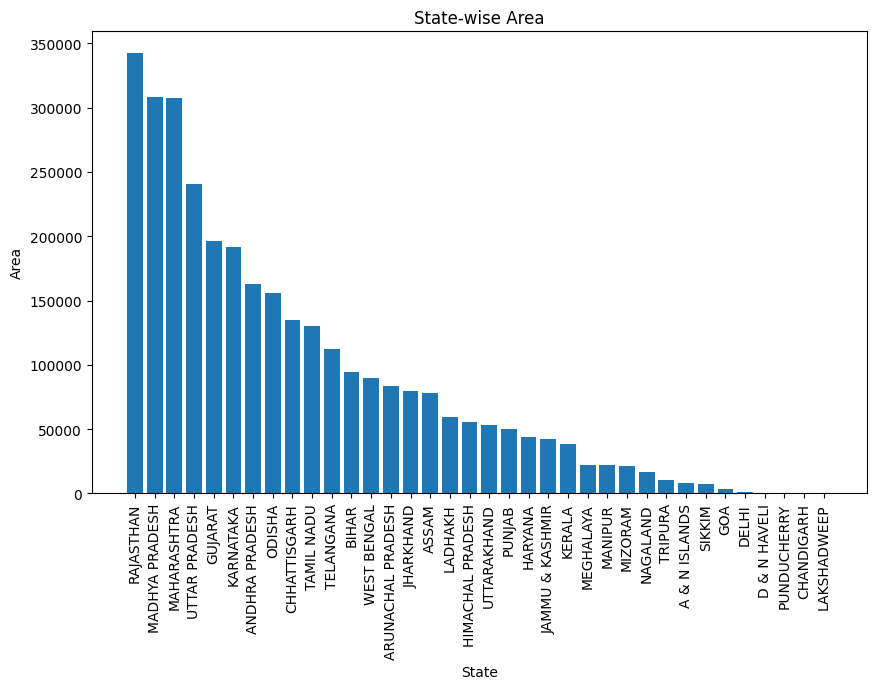

In [127]:
# Sort the DataFrame by 'Area ' for better visualization
state_area_crime_sorted_by_area = state_area_crime.sort_values(by='Area ', ascending=False)

# Plot bar plot for 'Area '
plt.figure(figsize=(10, 6))
plt.bar(state_area_crime_sorted_by_area['State '], state_area_crime_sorted_by_area['Area '])
plt.title('State-wise Area')
plt.xlabel('State')
plt.ylabel('Area')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

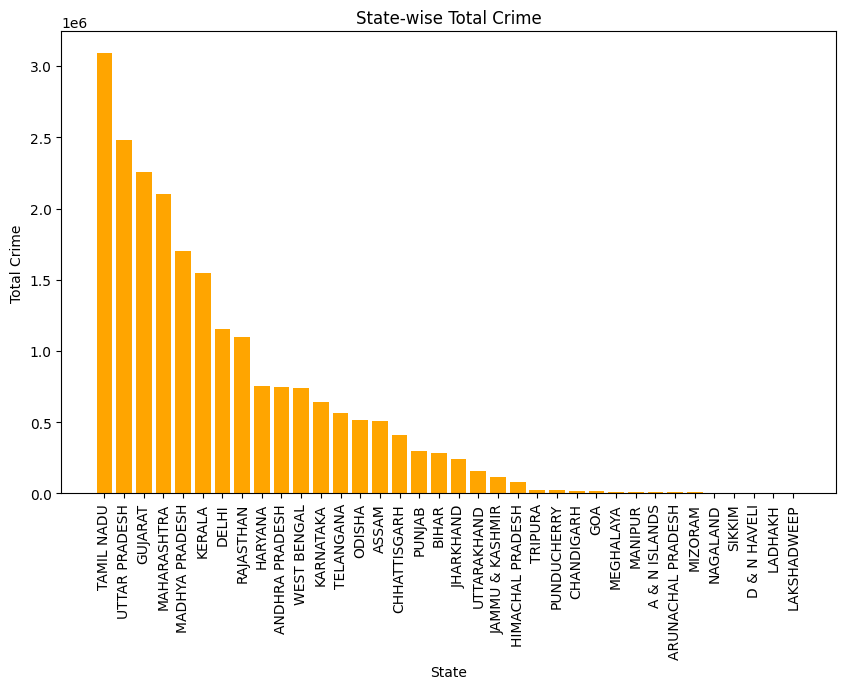

In [128]:
# Sort the DataFrame by 'Total_Crime ' for better visualization
state_area_crime_sorted_by_crime = state_area_crime.sort_values(by='Total_Crime ', ascending=False)

# Plot bar plot for 'Total_Crime '
plt.figure(figsize=(10, 6))
plt.bar(state_area_crime_sorted_by_crime['State '], state_area_crime_sorted_by_crime['Total_Crime '], color='orange')
plt.title('State-wise Total Crime')
plt.xlabel('State')
plt.ylabel('Total Crime')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [129]:
# Calculate the correlation coefficient between 'Area' and 'Total_Crime'
correlation = df['Area '].corr(df['Total_Crime '])
print("Correlation between Area and Total Crime:", correlation)

Correlation between Area and Total Crime: 0.6673267376811224


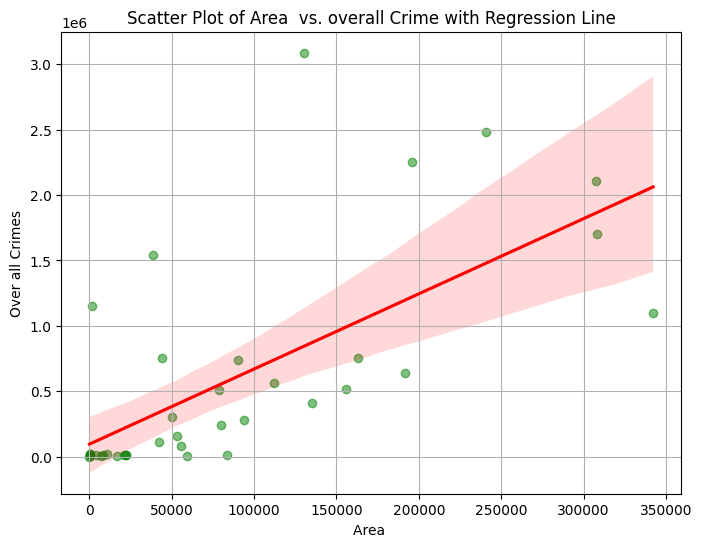

In [130]:
# Plot a scatter plot of 'Area' vs 'Total_Crime' with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Area ', y='Total_Crime ', data=df, scatter_kws={'color': 'green', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Area  vs. overall Crime with Regression Line')
plt.xlabel('Area ')
plt.ylabel('Over all Crimes')
plt.grid(True)  # Add gridlines for better visualization
plt.show()

In [131]:
# Sort the DataFrame by 'Area' in descending order to find the top three areas
top_three_areas = state_area_crime.sort_values(by='Area ', ascending=False).head(3)

# Sort the DataFrame by 'Area' in ascending order to find the bottom three areas
bottom_three_areas = state_area_crime.sort_values(by='Area ', ascending=True).head(3)

# Sort the DataFrame by 'Total_Crime' in descending order to find the top three total crime states
top_three_crime_states = state_area_crime.sort_values(by='Total_Crime ', ascending=False).head(3)

# Sort the DataFrame by 'Total_Crime' in ascending order to find the bottom three total crime states
bottom_three_crime_states = state_area_crime.sort_values(by='Total_Crime ', ascending=True).head(3)

# Display the results
print("Top Three States by Area:")
print(top_three_areas)
print("\nBottom Three States by Area:")
print(bottom_three_areas)
print("\nTop Three States by Total Crime:")
print(top_three_crime_states)
print("\nBottom Three States by Total Crime:")
print(bottom_three_crime_states)


Top Three States by Area:
            State    Area   Total_Crime 
20       RAJASTHAN  342239       1099887
12  MADHYA PRADESH  308252       1704712
13     MAHARASHTRA  307713       2104920

Bottom Three States by Area:
         State   Area   Total_Crime 
33  LAKSHADWEEP     32           534
29   CHANDIGARH    114         16734
35  PUNDUCHERRY    479         21213

Top Three States by Total Crime:
           State    Area   Total_Crime 
22     TAMIL NADU  130058       3088716
25  UTTAR PRADESH  240928       2479742
6         GUJARAT  196024       2255617

Bottom Three States by Total Crime:
          State   Area   Total_Crime 
33   LAKSHADWEEP     32           534
32       LADHAKH  59146           962
30  D & N HAVELI    603          2421


In [132]:
# Function to plot a pie chart
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data['Value'], labels=data['State'], autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

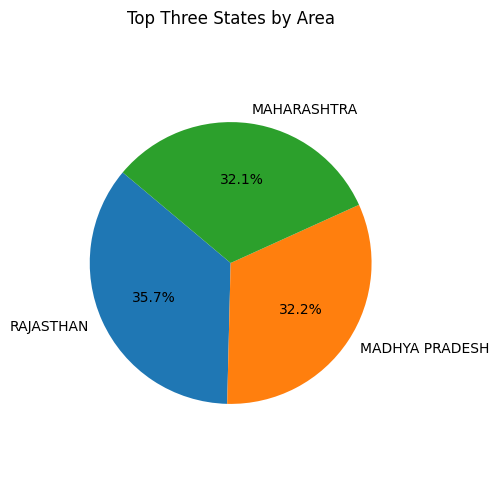

In [133]:
import matplotlib.pyplot as plt

# Function to plot a pie chart
def plot_pie_chart(data, title):
    plt.figure(figsize=(4, 6))
    plt.pie(data['Area '], labels=data['State '], autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Plot pie chart for top three states by area
plot_pie_chart(top_three_areas, 'Top Three States by Area')

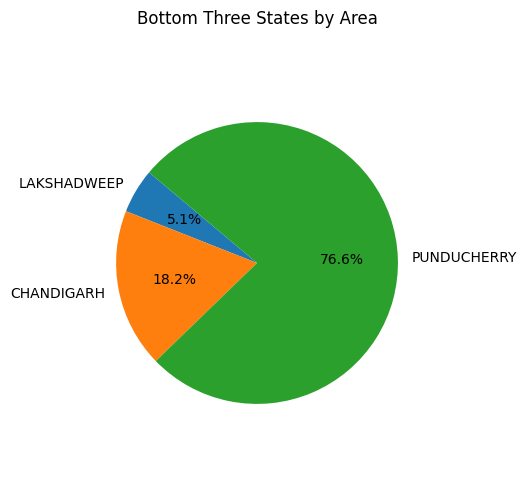

In [134]:
# Plot pie chart for bottom three states by area
plot_pie_chart(bottom_three_areas, 'Bottom Three States by Area')

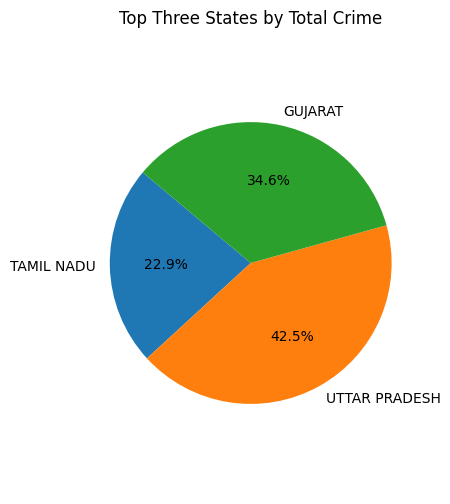

In [135]:
# Plot pie chart for top three states by total crime
plot_pie_chart(top_three_crime_states, 'Top Three States by Total Crime')

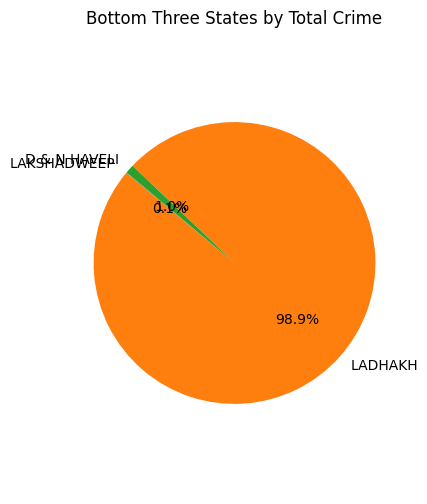

In [136]:
# Plot pie chart for bottom three states by total crime
plot_pie_chart(bottom_three_crime_states, 'Bottom Three States by Total Crime')

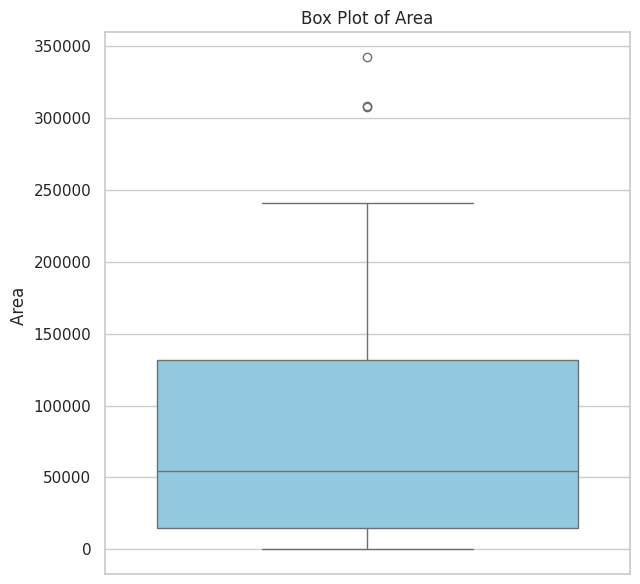

In [137]:
# Set the style of seaborn
sns.set(style="whitegrid")
# Create a figure with two subplots
plt.figure(figsize=(12, 6))
# Plot box plot for 'Area'
plt.subplot(1, 2, 1)
sns.boxplot(y=state_area_crime['Area '], color='skyblue')
plt.title('Box Plot of Area')
plt.tight_layout()
plt.show()


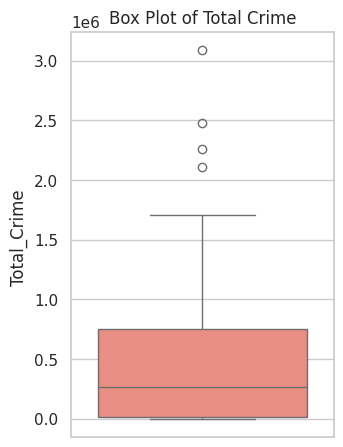

In [138]:
# Plot box plot for 'Total_Crime'
plt.subplot(1, 2, 2)
sns.boxplot(y=state_area_crime['Total_Crime '], color='salmon')
plt.title('Box Plot of Total Crime')
# Show the plot
plt.tight_layout()
plt.show()

# 5) Analysis of Population vs Overall Crime.

In [139]:
df.columns

Index(['State ', 'Area ', 'Population', 'State_Literacy_rate', 'Total_Crime ',
       'Crime rate 2018', 'Crime rate 2019', 'Crime rate 2020',
       'Crime rate 2021'],
      dtype='object')

In [140]:
# Retrieve 'State', 'Population', and 'Total_Crime' rate
Populations_crime_State = df[['State ', 'Population', 'Total_Crime ']]
Populations_crime_State

,State,Population,Total_Crime
0,ANDHRA PRADESH,53156000,750758
1,ARUNACHAL PRADESH,1562000,11236
2,ASSAM,35713000,508203
3,BIHAR,126756000,282148
4,CHHATTISGARH,30180000,408600
5,GOA,1575000,14968
6,GUJARAT,71507000,2255617
7,HARYANA,30209000,756391
8,HIMACHAL PRADESH,7468000,78981
9,JHARKHAND,39466000,242205


In [141]:
# Sort the DataFrame by 'Population' in descending order to find the top three Population
top_three_areas = Populations_crime_State.sort_values(by='Population', ascending=False).head(3)

# Sort the DataFrame by 'Population' in ascending order to find the bottom three Population
bottom_three_areas = Populations_crime_State.sort_values(by='Population', ascending=True).head(3)

# Sort the DataFrame by 'Total_Crime ' in descending order to find the top three total crime states
top_three_crime_states = Populations_crime_State.sort_values(by='Total_Crime ', ascending=False).head(3)

# Sort the DataFrame by 'Total_Crime ' in ascending order to find the bottom three total crime states
bottom_three_crime_states = Populations_crime_State.sort_values(by='Total_Crime ', ascending=True).head(3)

# Display the results
print("Top Three States by Population:")
print(top_three_areas)
print("\nBottom Three States by Population:")
print(bottom_three_areas)
print("\nTop Three States by Total Crime:")
print(top_three_crime_states)
print("\nBottom Three States by Total Crime:")
print(bottom_three_crime_states)

Top Three States by Population:
           State   Population  Total_Crime 
25  UTTAR PRADESH   235687000       2479742
3           BIHAR   126756000        282148
13    MAHARASHTRA   126385000       2104920

Bottom Three States by Population:
           State   Population  Total_Crime 
33    LAKSHADWEEP       69000           534
32        LADHAKH      300000           962
28  A & N ISLANDS      403000         11607

Top Three States by Total Crime:
           State   Population  Total_Crime 
22     TAMIL NADU    76860000       3088716
25  UTTAR PRADESH   235687000       2479742
6         GUJARAT    71507000       2255617

Bottom Three States by Total Crime:
          State   Population  Total_Crime 
33   LAKSHADWEEP       69000           534
32       LADHAKH      300000           962
30  D & N HAVELI     1263000          2421


In [142]:
# Calculate the correlation coefficient between 'Population' and 'Total_Crime'
correlation = df['Population'].corr(df['Total_Crime '])
print("Correlation between Population and Total Crime:", correlation)

Correlation between Population and Total Crime: 0.7296092700380377


# Population vs. Overall Crime

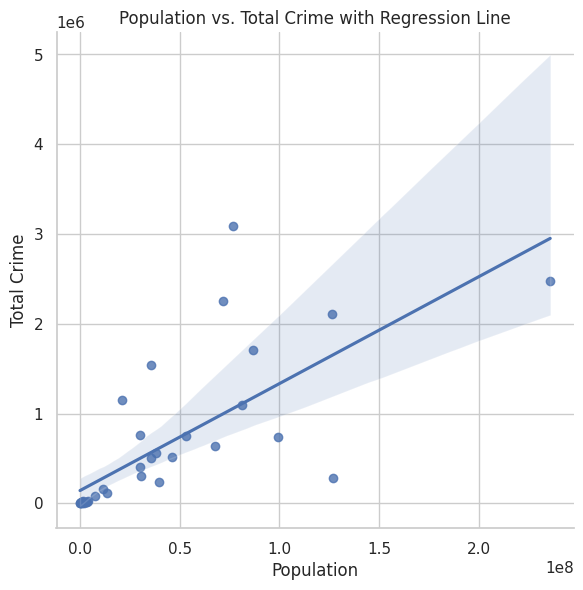

In [143]:
# Create scatter plot with regression line
sns.lmplot(x='Population', y='Total_Crime ', data=Populations_crime_State, height=6)
plt.title('Population vs. Total Crime with Regression Line')
plt.xlabel('Population')
plt.ylabel('Total Crime')
plt.grid(True)
plt.show()

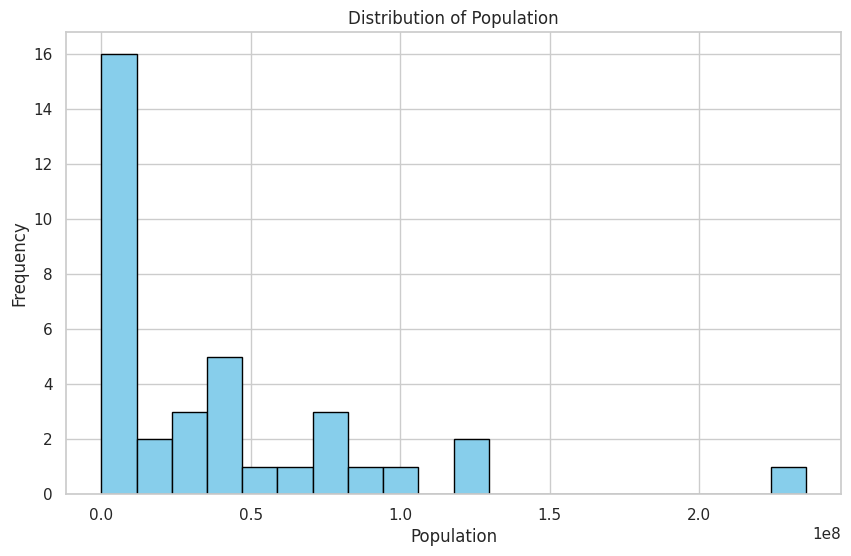

In [144]:
plt.figure(figsize=(10, 6))
plt.hist(Populations_crime_State['Population'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Distribution of Population')
plt.grid(True)
plt.show()

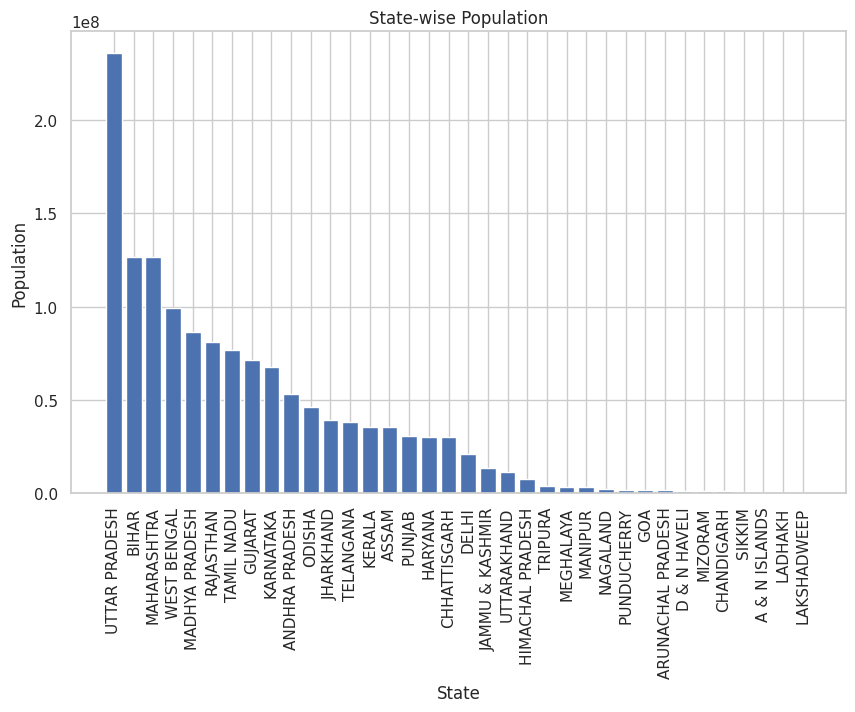

In [145]:
# Sort the DataFrame by 'Population' in descending order
Populations_sorted_by_population = Populations_crime_State.sort_values(by='Population', ascending=False)

# Plot bar plot for 'Population'
plt.figure(figsize=(10, 6))
plt.bar(Populations_sorted_by_population['State '], Populations_sorted_by_population['Population'])
plt.title('State-wise Population')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


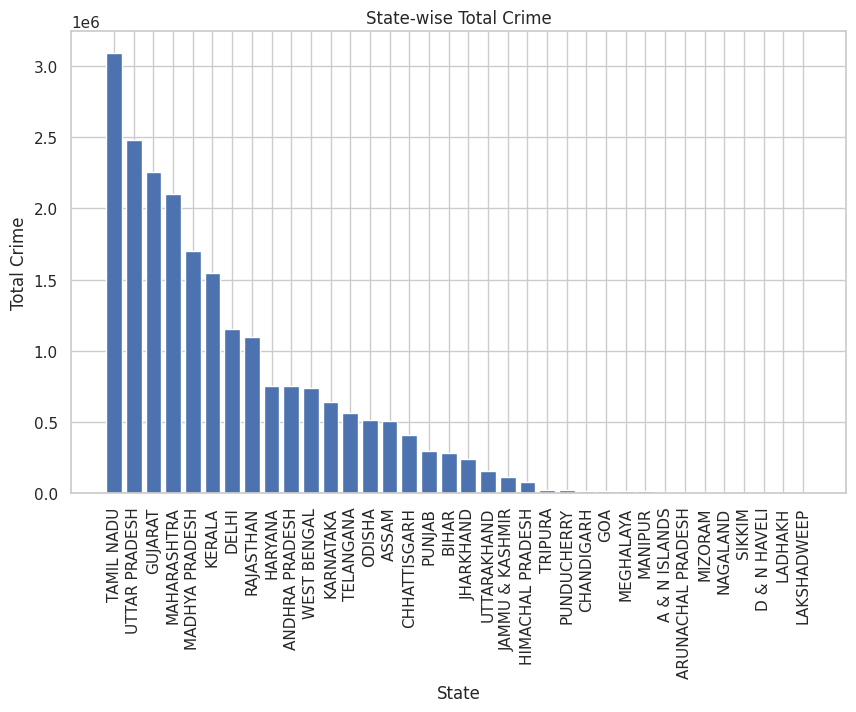

In [146]:
# Sort the DataFrame by 'Total Crime' in descending order
Populations_sorted_by_crime = Populations_crime_State.sort_values(by='Total_Crime ', ascending=False)

# Plot bar plot for 'Total Crime'
plt.figure(figsize=(10, 6))
plt.bar(Populations_sorted_by_crime['State '], Populations_sorted_by_crime['Total_Crime '])
plt.title('State-wise Total Crime')
plt.xlabel('State')
plt.ylabel('Total Crime')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


# Crimes in India
## Analysis Report
**Introduction:**
India's crime landscape is a dynamic tapestry reflecting its diverse society and evolving challenges. From bustling urban centers to remote rural areas, criminal activities span a spectrum of offenses, driven by socio-economic disparities, cultural nuances, and technological advancements. While the Indian Penal Code forms the backbone of legal deterrence, specialized laws target specific crime domains like cybercrime and terrorism. However, issues like corruption, delays in the judicial process, and inadequate law enforcement infrastructure continue to challenge effective crime control. Urban hubs witness a surge in crimes like cyber fraud and theft, while rural landscapes grapple with caste-based violence and dowry-related offenses. Modernization efforts aim to bolster law enforcement and judicial capabilities, but addressing root causes and fostering social cohesion remains paramount in India's ongoing battle against crime.

**Findings:**
**State Area (km²):**
- The mean state area is approximately 84,386 square kilometers, with a standard deviation of 93,653 square kilometers.
- The smallest state area is 32 square kilometers, and the largest state area is 342,239 square kilometers.
- 25% of the states have an area of less than 16,579 square kilometers, while 75% have an area of less than 125,562.75 square kilometers.

**Population of State:**
- The mean population of states is approximately 36,677,580, with a standard deviation of 49,362,090.
- The smallest population among states is 69,000, and the largest population is 235,687,000.
- 25% of states have a population less than 1,792,750, while 75% have a population less than 51,436,000.

**State Literacy Rate:**
- The mean literacy rate among states is approximately 161.45, with a standard deviation of 14.30.
- The lowest literacy rate recorded is 133, while the highest is 193.
- 25% of states have a literacy rate lower than 151.25, while 75% have a literacy rate lower than 172.

**Total Crime:**
- The mean total reported crimes across states is approximately 569,976, with a standard deviation of 806,590.
- The minimum reported crime count is 534, while the maximum is 3,088,716.
25% of states have reported crimes less than 13,632, while 75% have reported crimes less than 748,143.50.

**Crime Rates (2018, 2019, 2020, 2021):**
- Crime rates vary across years, with mean rates ranging from approximately 287 to 345 per 100,000 population.
- Standard deviations are relatively high, indicating significant variability in crime rates among states.
- Crime rates generally show an increasing trend from 2018 to 2020, with some fluctuations in 2021.
- 25% of states have crime rates below 153 (2018) to 250.5 (2020), while 75% have rates below 323.75 (2018) to 370 (2021).

**Correlation Analysis:**

**State Area:**
- Strong positive correlation with Population of State (0.742140) and Total Crime (0.676439).
- Moderate positive correlation with Crime rates across all years (0.260028 to 0.326981).
**Population of State:**
- Strong positive correlation with State Area (0.742140) and Total Crime (0.736955).
- Moderate positive correlation with Crime rates across all years (0.249997 to 0.270910).
**State Literacy Rate:**
- Weak negative correlation with State Area (-0.453602).
- Weak positive correlation with Crime rates across all years (0.204104 to 0.269901).
**Total Crime:**
- Strong positive correlation with State Area (0.676439) and Population of State (0.736955).
- Strong positive correlation with Crime rates across all years (0.622043 to 0.735749).
**Crime Rates (2018, 2019, 2020, 2021):**
- Moderate to strong positive correlations among each other, indicating consistency in crime rates over the years.
- The highest correlation is observed between Crime_rate_2018 and Crime_rate_2019 (0.992052), indicating high similarity between crime rates in these two consecutive years.

**Analysis Points:**
- 1) Analysis of Literacy Rate vs Total Crimes:
- Minimum of State Literacy rate: 133
- Maximum of State Literacy rate: 193
- Mean of State Literacy rate: 161.7
- Median of State Literacy rate: 164.0
- The scatter plot of Literacy rate vs Total Crime indicates no clear
relationship between them.

- 2) Analysis of the crime type vs each state vs Literacy rate:
- Highest literacy rate State in India: Kerala (193)
- Lowest Literacy Rates State in India: Andhra Pradesh (133)
- Top 3 states with the highest literacy rates: Kerala, Puducherry, Nagaland
- Bottom 3 states with the lowest literacy rates: Tamil Nadu, Arunachal Pradesh, Andhra Pradesh
- Analysis of various crime types (violent crimes, murders, rapes, kidnappings, crimes against children, extortion, robbery, hit & run) across states indicates varying patterns and outliers in different crime categories.


## Conclusion:
The analysis provides valuable insights into the complex dynamics of crime in India. Despite efforts to combat crime through legal frameworks and law enforcement measures, challenges persist due to socio-economic disparities, cultural factors, and technological advancements. Key findings from the analysis include:

- 1) Diverse Crime Landscape: India's crime landscape is diverse, with different states exhibiting varying patterns of crime types and rates.

- 2) Socio-Economic Factors: Socio-economic factors such as literacy rate, population size, and state area show correlations with crime rates. States with higher population densities and larger areas tend to report higher total crimes, while literacy rates show a weaker correlation with crime.

- 3) Temporal Trends: Crime rates fluctuate over time, with noticeable variations across different years. However, some crime rates exhibit consistency over consecutive years, indicating persistent challenges in certain crime domains.

- 4) Regional Disparities: Regional disparities are evident in crime patterns, with urban centers experiencing different crime challenges compared to rural areas. Factors such as caste-based violence, dowry-related offenses, and cyber fraud are more prevalent in specific regions.

- 5) Policy Implications: The findings underscore the importance of targeted policy interventions to address region-specific crime challenges. Strategies aimed at improving law enforcement capabilities, enhancing judicial processes, and addressing socio-economic disparities can contribute to effective crime control.